In [1]:
# Exploratory Data Analysis (EDA) en Python
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from sklearn.preprocessing import StandardScaler
from IPython.display import display, HTML

In [2]:
# Definición de funciones
def resumen_dataset(df: pd.DataFrame, nombre: str = "Dataset"):
    """
    Genera un resumen visual y detallado de un DataFrame de pandas.
    
    Incluye:
    - Información general
    - Tipos de datos
    - Valores faltantes
    - Estadísticas descriptivas (numéricas y categóricas)
    - Valores únicos (en tabla separada)
    - Muestras del dataset
    """
    estilo_titulo = "font-size:22px; font-weight:bold; color:#2A4D69; margin-top:20px;"
    estilo_tabla = "border:1px solid #ddd; border-radius:5px; padding:10px;"
    separador = "<hr style='margin:20px 0;'>"

    # Título general
    display(HTML(f"<h2 style='{estilo_titulo}'>{nombre} - Resumen General</h2>"))
    display(HTML(f"<p><b>Filas:</b> {df.shape[0]} &nbsp;&nbsp; <b>Columnas:</b> {df.shape[1]}</p>"))

    # Tipos de datos
    display(HTML(f"<h3 style='{estilo_titulo}'>Tipos de Datos</h3>"))
    display(df.dtypes.to_frame("Tipo de Dato").style.set_table_attributes(f"style='{estilo_tabla}'"))

    # Valores faltantes
    display(HTML(f"<h3 style='{estilo_titulo}'>Valores Faltantes</h3>"))
    missing = df.isnull().sum()
    missing = missing[missing > 0]
    if not missing.empty:
        display(missing.to_frame("Valores Faltantes").style.set_table_attributes(f"style='{estilo_tabla}'"))
    else:
        display(HTML("<p>No hay valores faltantes ✅</p>"))

    display(HTML(separador))

    # Estadísticas descriptivas (numéricas + categóricas)
    display(HTML(f"<h3 style='{estilo_titulo}'>Estadísticas Descriptivas</h3>"))
    
    numeric_cols = df.select_dtypes(include=["int64", "float64"])
    cat_cols = df.select_dtypes(include=["object", "category"])
    
    if not numeric_cols.empty:
        display(HTML("<h4><b>📊 Variables Numéricas</b></h4>"))
        display(numeric_cols.describe().transpose().style.set_table_attributes(f"style='{estilo_tabla}'"))
    else:
        display(HTML("<p>No hay variables numéricas.</p>"))
    
    if not cat_cols.empty:
        display(HTML("<h4><b>🔤 Variables Categóricas</b></h4>"))
        display(cat_cols.describe().transpose().style.set_table_attributes(f"style='{estilo_tabla}'"))
    else:
        display(HTML("<p>No hay variables categóricas.</p>"))

    display(HTML(separador))

    # Valores únicos
    display(HTML(f"<h3 style='{estilo_titulo}'>Valores Únicos</h3>"))
    unique_info = []
    for col in df.columns:
        uniques = df[col].unique()
        n_uniques = len(uniques)
        sample_uniques = ", ".join(map(str, uniques))
        if n_uniques > 5:
            sample_uniques += ", ..."
        unique_info.append((col, n_uniques, sample_uniques))

    df_uniques = pd.DataFrame(unique_info, columns=["Columna", "N° Valores Únicos", "Ejemplos de Valores"])
    display(df_uniques.style.set_table_attributes(f"style='{estilo_tabla}'"))

    display(HTML(separador))

    # Muestras de datos
    display(HTML(f"<h3 style='{estilo_titulo}'>Primeras 5 Filas</h3>"))
    display(df.head().style.set_table_attributes(f"style='{estilo_tabla}'"))

    display(HTML(f"<h3 style='{estilo_titulo}'>Últimas 5 Filas</h3>"))
    display(df.tail().style.set_table_attributes(f"style='{estilo_tabla}'"))

    display(HTML(f"<h3 style='{estilo_titulo}'>5 Filas Aleatorias</h3>"))
    display(df.sample(5, random_state=42).style.set_table_attributes(f"style='{estilo_tabla}'"))

    display(HTML("<hr style='margin-top:30px;'>"))


def plot_distributions(df, num_cols=None, per_row=3, bins=30):
    """
    Genera histogramas con KDE para visualizar la distribución de las variables numéricas.
    Incluye en la leyenda los valores mínimos y máximos de cada columna.

    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame con los datos.
    num_cols : list, opcional
        Lista de columnas numéricas a graficar. Si no se especifica, toma todas las numéricas.
    per_row : int, opcional
        Número de gráficos por fila (default=3).
    bins : int, opcional
        Número de bins del histograma (default=30).
    """
    if num_cols is None:
        num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    n = len(num_cols)
    rows = math.ceil(n / per_row)

    plt.figure(figsize=(5 * per_row, 4 * rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(rows, per_row, i)
        sns.histplot(df[col], kde=True, bins=bins)
        plt.title(f'Distribución de {col}')
        plt.xlabel(col)
        plt.ylabel("Frecuencia")

        # Calcular valores min y max
        min_val = df[col].min()
        max_val = df[col].max()

        # Mostrar en la leyenda
        plt.legend([f'Mín: {min_val:.2f}\nMáx: {max_val:.2f}'], loc='upper right', frameon=True)

    plt.tight_layout()
    plt.show()

def plot_boxplots(df, num_cols=None, per_row=3):
    """
    Genera boxplots verticales para identificar outliers en las columnas numéricas del DataFrame.
    
    Parámetros:
    -----------
    df : pandas.DataFrame
        DataFrame con los datos.
    num_cols : list, opcional
        Lista de columnas a graficar. Si no se especifica, toma las numéricas.
    per_row : int, opcional
        Número de gráficos por fila (default=3).
    """
    if num_cols is None:
        num_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    n = len(num_cols)
    rows = math.ceil(n / per_row)
    
    plt.figure(figsize=(5 * per_row, 5 * rows))
    
    for i, col in enumerate(num_cols, 1):
        plt.subplot(rows, per_row, i)
        sns.boxplot(y=df[col])  # Vertical
        plt.title(f'Boxplot de {col}')
        plt.xlabel("")
        plt.ylabel(col)
    
    plt.tight_layout()
    plt.show()

def plot_categorical_distributions(df, cat_cols=None, per_row=3):
    """
    Plots the distribution of categorical variables using countplots.
    The 'Reason for absence' column gets its own full-width row.
    Other categorical variables are displayed 3 per row.

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame containing the data.
    cat_cols : list, optional
        List of categorical columns to plot. If None, it automatically selects object and category types.
    per_row : int, optional
        Number of plots per row (default=3).
    """
    if cat_cols is None:
        cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    # Handle "Reason for absence" separately if present
    reason_col = None
    if "Reason for absence" in cat_cols:
        reason_col = "Reason for absence"
        cat_cols.remove(reason_col)

    # Total number of remaining categorical columns
    n = len(cat_cols)
    rows = math.ceil(n / per_row)

    # --- Plot the reason column first ---
    if reason_col:
        plt.figure(figsize=(6 * per_row, 6))
        sns.countplot(y=df[reason_col], order=df[reason_col].value_counts().index, color="#2a9d8f")
        plt.title(f"Distribution of {reason_col}")
        plt.xlabel("Count")
        plt.ylabel(reason_col)
        plt.tight_layout()
        plt.show()

    # --- Plot the remaining categorical columns ---
    plt.figure(figsize=(6 * per_row, 4 * rows))

    for i, col in enumerate(cat_cols, 1):
        plt.subplot(rows, per_row, i)
        sns.countplot(y=df[col], order=df[col].value_counts().index, color="#2a9d8f")
        plt.title(f"Distribution of {col}")
        plt.xlabel("Count")
        plt.ylabel(col)

    plt.tight_layout()
    plt.show()

def plot_correlation_map(df, cols):
    plt.figure(figsize=(12,10))
    sns.heatmap(df[cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
    plt.title("Mapa de correlaciones")
    plt.show()


def plot_absenteeism_relationships(df, target_col='Absenteeism time in hours', num_cols=None, per_row=3):
    """
    Plots scatterplots showing the relationship between absenteeism time and numeric features.
    Automatically arranges 3 plots per row (customizable).

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame containing numeric columns and target column.
    target_col : str, optional
        Column name representing absenteeism time (default='Absenteeism time in hours').
    num_cols : list, optional
        List of numeric columns to plot. If None, automatically selects numeric columns.
    per_row : int, optional
        Number of plots per row (default=3).
    """
    if target_col not in df.columns:
        print(f"⚠️ Column '{target_col}' not found in DataFrame.")
        return
    
    if num_cols is None:
        num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Exclude target column
    num_cols = [col for col in num_cols if col != target_col]

    n = len(num_cols)
    rows = math.ceil(n / per_row)

    plt.figure(figsize=(6 * per_row, 4 * rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(rows, per_row, i)
        sns.scatterplot(x=df[col], y=df[target_col], alpha=0.6, color="#2a9d8f", edgecolor=None)
        plt.title(f'{target_col} vs {col}')
        plt.xlabel(col)
        plt.ylabel(target_col)

    plt.tight_layout()
    plt.show()

#Eliminar outliers
def remove_outliers_zscore(df, columns, threshold=3):
    """
    Elimina outliers usando el método del Z-score.
    Se eliminan filas donde |Z| > threshold.
    """
    df_clean = df.copy()
    for col in columns:
        mean = df_clean[col].mean()
        std = df_clean[col].std()
        z_scores = (df_clean[col] - mean) / std
        df_clean = df_clean[np.abs(z_scores) <= threshold]
    return df_clean

def remove_outliers_iqr(df, columns, multiplier=1.5):
    """
    Elimina outliers de las columnas especificadas usando el método IQR.
    Retorna un nuevo DataFrame sin los outliers.
    """
    df_clean = df.copy()
    for col in columns:
        Q1 = df_clean[col].quantile(0.25)
        Q3 = df_clean[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - multiplier * IQR
        upper = Q3 + multiplier * IQR
        df_clean = df_clean[(df_clean[col] >= lower) & (df_clean[col] <= upper)]
    return df_clean

    
def clean_outliers(df, method="iqr", threshold=3, multiplier=1.5):
    """
    Limpia outliers de todas las columnas numéricas del DataFrame.
    method: 'iqr' o 'zscore'
    """
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if method == "iqr":
        return remove_outliers_iqr(df, numeric_cols, multiplier)
    elif method == "zscore":
        return remove_outliers_zscore(df, numeric_cols, threshold)
    else:
        raise ValueError("Método no válido. Usa 'iqr' o 'zscore'.")

def create_behavioral_features(df):
    """
    Crea nuevas características relacionadas con estilo de vida, fiabilidad y desempeño laboral.
    """

    df = df.copy()

    binary_cols = ["Social drinker", "Social smoker", "Disciplinary failure"]
    for col in binary_cols:
        if df[col].dtype == object:
            df[col] = df[col].astype(str).str.strip().str.lower().map({
                'yes': 1, 'no': 0, 'true': 1, 'false': 0
            }).fillna(df[col])
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)
        
    # 1️⃣ Lifestyle risk score: suma ponderada de factores de riesgo
    df["Lifestyle_risk_score"] = (
        1.5 * df["Social drinker"] +     # ser bebedor social
        2.0 * df["Social smoker"] +      # fumar es más riesgoso
        1.0 * df["Pet"] +                # tener mascotas implica posibles ausencias
        1.5 * df["Son"] +                # tener hijos implica responsabilidad adicional
        2.0 * df["Disciplinary failure"] # antecedentes disciplinarios
    )

    # 2️⃣ Dependents total y flag
    df["Dependents_count"] = df["Son"] + df["Pet"]
    df["Has_dependents"] = np.where(df["Dependents_count"] > 0, 1, 0)

    # 3️⃣ Has pets or children (versión simplificada de la anterior, pero conservada)
    df["Has_family_or_pets"] = df["Has_dependents"]

    # 4️⃣ Healthy lifestyle (versión inversa del riesgo)
    # Se asume: no fumador (1), no bebedor (1), BMI saludable (18.5–25) → 1, de lo contrario 0
    df["Healthy_lifestyle"] = (
        (1 - df["Social smoker"]) + 
        (1 - df["Social drinker"]) + 
        df["Body mass index"].between(18.5, 25).astype(int)
    )

    # 5️⃣ BMI category
    def categorize_bmi(bmi):
        if bmi < 18.5:
            return "Underweight"
        elif bmi < 25:
            return "Normal"
        elif bmi < 30:
            return "Overweight"
        else:
            return "Obese"
    
    df["BMI_category"] = df["Body mass index"].apply(categorize_bmi)

    # 6️⃣ Penalty risk score
    df["Penalty_risk_score"] = df["Disciplinary failure"] * (1 - df["Hit target"] / 100)

    # 7️⃣ Reliability score
    df["Reliability_score"] = 1 / (1 + df["Absenteeism time in hours"])
    # También podrías normalizarlo:
    df["Reliability_score_norm"] = (df["Reliability_score"] - df["Reliability_score"].min()) / (
        df["Reliability_score"].max() - df["Reliability_score"].min()
    )

    # 8️⃣ Workload deviation
    mean_workload = df["Work load Average/day"].mean()
    df["Workload_deviation"] = df["Work load Average/day"] - mean_workload

    # 9️⃣ Age group: categorical representation of age ranges
    df["Age_group"] = pd.cut(
        df["Age"],
        bins=[0, 30, 45, np.inf],
        labels=["Young", "Middle-aged", "Senior"]
    )

    # 🔟 Service group: employee tenure category
    df["Service_group"] = pd.cut(
        df["Service time"],
        bins=[0, 5, 10, np.inf],
        labels=["Short", "Medium", "Long"]
    )

    # 1️⃣1️⃣ Distance group: proximity of residence to workplace
    df["Distance_group"] = pd.cut(
        df["Distance from Residence to Work"],
        bins=[0, 10, 20, np.inf],
        labels=["Near", "Moderate", "Far"]
    )

    return df

def preprocess_dataset(df, target_col='Absenteeism time in hours'):
    """
    Preprocesses a dataset for machine learning by:
    1. Converting categorical columns to dummy variables.
    2. Normalizing numeric columns (except the target column).

    Parameters
    ----------
    df : pandas.DataFrame
        Input DataFrame containing mixed data types.
    target_col : str, optional
        Column name of the target variable (default='Absenteeism time in hours').

    Returns
    -------
    pandas.DataFrame
        Preprocessed DataFrame ready for model training.
    """
    df = df.copy()

    # Separate categorical and numeric columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

    # Remove the target column from normalization
    if target_col in num_cols:
        num_cols.remove(target_col)

    # 1️⃣ Convert categorical variables to dummies (one-hot encoding)
    df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True, dtype=float)

    # 2️⃣ Normalize numeric columns using StandardScaler
    scaler = StandardScaler()
    df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

    return df_encoded



In [3]:
# Configuración para que las gráficas se vean bien
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

#Cargamos el dataset
df = pd.read_csv('../data/raw/work_absenteeism_original.csv')

In [4]:
resumen_dataset(df, nombre="Work Absenteeism")

> ✅ **No se detectaron valores faltantes en el dataset.**  
> 
> ⚠️ **Sin embargo**, se identificaron registros con el valor **`0` en la columna `Reason for absence`**,  
> el cual **no corresponde a ninguna categoría válida**.  
> 
> 🔍 **Recomendación:** Analizar si estos valores representan datos perdidos o una categoría no especificada,  
> y decidir si deben **reemplazarse, imputarse o excluirse** en el análisis posterior.


In [5]:
# Contar cuántos valores son 0 en la columna 'Reason for absence'
zeros_count = (df['Reason for absence'] == 0).sum()

# Calcular el porcentaje que representan sobre el total
zeros_percent = (zeros_count / len(df)) * 100

print(f"Valores con 'Reason for absence' = 0: {zeros_count} ({zeros_percent:.2f}%)")


Valores con 'Reason for absence' = 0: 43 (5.81%)


> ⚠️ **Observación:** Se identificaron **43 registros** sin una razón de ausencia válida (`Reason for absence = 0`),  
> lo que representa aproximadamente **el 5.8% del total del dataset**.  
>
> 🔎 **Siguiente paso:** Analizaremos la columna **`Disciplinary failure`** para explorar si existe alguna relación  
> entre la falta de registro de la razón de ausencia y la falla disciplinaria.


In [6]:
# Contar cuántos valores son 0 en la columna 'Reason for absence'
zeros_count = (df['Disciplinary failure'] == 1).sum()

# Calcular el porcentaje que representan sobre el total
zeros_percent = (zeros_count / len(df)) * 100

print(f"Valores con 'Disciplinary failure' = 1: {zeros_count} ({zeros_percent:.2f}%)")

Valores con 'Disciplinary failure' = 1: 40 (5.41%)


> 📊 **Análisis:** Se identificaron **40 registros** con `Disciplinary failure = 1`,  
> lo que representa aproximadamente **el 5.41% del total**.  
>
> 🔎 Este valor es **muy similar** al porcentaje de registros con `Reason for absence = 0`.  
> **¿Podría existir alguna correlación** entre la falta de registro de la razón de ausencia  
> y los casos de incumplimiento disciplinario? Vale la pena explorarlo más a fondo.


In [7]:
# Filtrar los registros que cumplen ambas condiciones
filtro = (df['Reason for absence'] == 0) & (df['Disciplinary failure'] == 1)

# Contar cuántos registros hay
count = filtro.sum()

# Calcular el porcentaje sobre el total
percent = (count / len(df)) * 100

print(f"Registros con 'Reason for absence' = 0 y 'Disciplinary failure' = 1: {count} ({percent:.2f}%)")


Registros con 'Reason for absence' = 0 y 'Disciplinary failure' = 1: 40 (5.41%)


> 📊 **Resultado:** Se encontraron **40 registros** en los que  
> `Reason for absence = 0` y `Disciplinary failure = 1`,  
> lo que representa aproximadamente **el 5.41% del total del dataset**.  
>
> 🔍 Este hallazgo refuerza la posible relación entre la **ausencia de una razón registrada**  
> y la **falla disciplinaria**. Es seguro inferir que los casos en los que no hay razón de ausencia
> sean simplemente porque el motivo fue una falta no justificada. Vamos a ajustar el dataset para reflejar esto
> y realizar mapeos adicionales.


In [8]:
#Vamos a mapear la columna Reason for absence para que muestre informacion significativa
#Esto es para leer de mejor manera las gráficas, no es algo que queramos hacer en los scripts de transformación

# Diccionario de mapeo
reason_map = {
    0: np.nan,
    1: "1 Certain infectious and parasitic diseases",
    2: "2 Neoplasms",
    3: "3 Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism",
    4: "4 Endocrine, nutritional and metabolic diseases",
    5: "5 Mental and behavioural disorders",
    6: "6 Diseases of the nervous system",
    7: "7 Diseases of the eye and adnexa",
    8: "8 Diseases of the ear and mastoid process",
    9: "9 Diseases of the circulatory system",
    10: "10 Diseases of the respiratory system",
    11: "11 Diseases of the digestive system",
    12: "12 Diseases of the skin and subcutaneous tissue",
    13: "13 Diseases of the musculoskeletal system and connective tissue",
    14: "14 Diseases of the genitourinary system",
    15: "15 Pregnancy, childbirth and the puerperium",
    16: "16 Certain conditions originating in the perinatal period",
    17: "17 Congenital malformations, deformations and chromosomal abnormalities",
    18: "18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified",
    19: "19 Injury, poisoning and certain other consequences of external causes",
    20: "20 External causes of morbidity and mortality",
    21: "21 Factors influencing health status and contact with health services",
    22: "22 Patient follow-up (CID)",
    23: "23 Medical consultation",
    24: "24 Blood donation",
    25: "25 Laboratory examination",
    26: "26 Unjustified absence",
    27: "27 Physiotherapy",
    28: "28 Dental consultation"
}

# Mapear la columna
df['Reason for absence'] = df['Reason for absence'].map(reason_map)

# 3. Month of absence: 1-12 a nombres de meses, 0 -> 'Missing'
month_map = {
    0: np.nan, 1: 'January', 2: 'February', 3: 'March', 4: 'April',
    5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September',
    10: 'October', 11: 'November', 12: 'December'
}
df['Month of absence'] = df['Month of absence'].map(month_map)

# 4. Day of the week: Monday (2), Tuesday (3), ..., Friday (6)
day_map = {
    2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday'
}
df['Day of the week'] = df['Day of the week'].map(day_map)

# 5. Seasons: summer (1), autumn (2), winter (3), spring (4)
seasons_map = {1: 'Summer', 2: 'Autumn', 3: 'Winter', 4: 'Spring'}
df['Seasons'] = df['Seasons'].map(seasons_map)

# 12. Disciplinary failure: yes=1; no=0
df['Disciplinary failure'] = df['Disciplinary failure'].map({0: 'No', 1: 'Yes'})

# 13. Education: high school (1), graduate (2), postgraduate (3), master and doctor (4)
education_map = {1: 'High school', 2: 'Graduate', 3: 'Postgraduate', 4: 'Master/Doctor'}
df['Education'] = df['Education'].map(education_map)

# 15. Social drinker: yes=1; no=0
df['Social drinker'] = df['Social drinker'].map({0: 'No', 1: 'Yes'})

# 16. Social smoker: yes=1; no=0
df['Social smoker'] = df['Social smoker'].map({0: 'No', 1: 'Yes'})


# Reemplazar Reason for absence por 'Disciplinary failure'
# cuando es NaN y Disciplinary failure == 'Yes'
mask = df['Reason for absence'].isna() & (df['Disciplinary failure'] == 'Yes')
df.loc[mask, 'Reason for absence'] = '0 Disciplinary failure'

In [9]:
#Verificar cambios
resumen_dataset(df, nombre="Work Absenteeism")

> ⚠️ **Observación:** Se identificaron **3 registros** con valores faltantes en la columna **`Reason for absence`**  
> y **3 registros** adicionales en la columna **`Month`** que no fue posible **imputar ni mapear correctamente**.  
>
> 🧹 **Acción:** Procederemos a **eliminar estos registros** del dataset para mantener la consistencia  
> y asegurar la calidad de los datos antes de continuar con el análisis.


In [10]:
df = df.dropna(subset=['Reason for absence', 'Month of absence']).reset_index(drop=True)

> 🔍 **Análisis de valores atípicos:**  
> A continuación, examinaremos la presencia de **valores atípicos** en las variables numéricas del dataset.  
> Este paso es fundamental para **identificar posibles errores de captura, casos extremos o comportamientos inusuales**  
> que podrían afectar el rendimiento de los modelos o distorsionar las conclusiones del análisis.


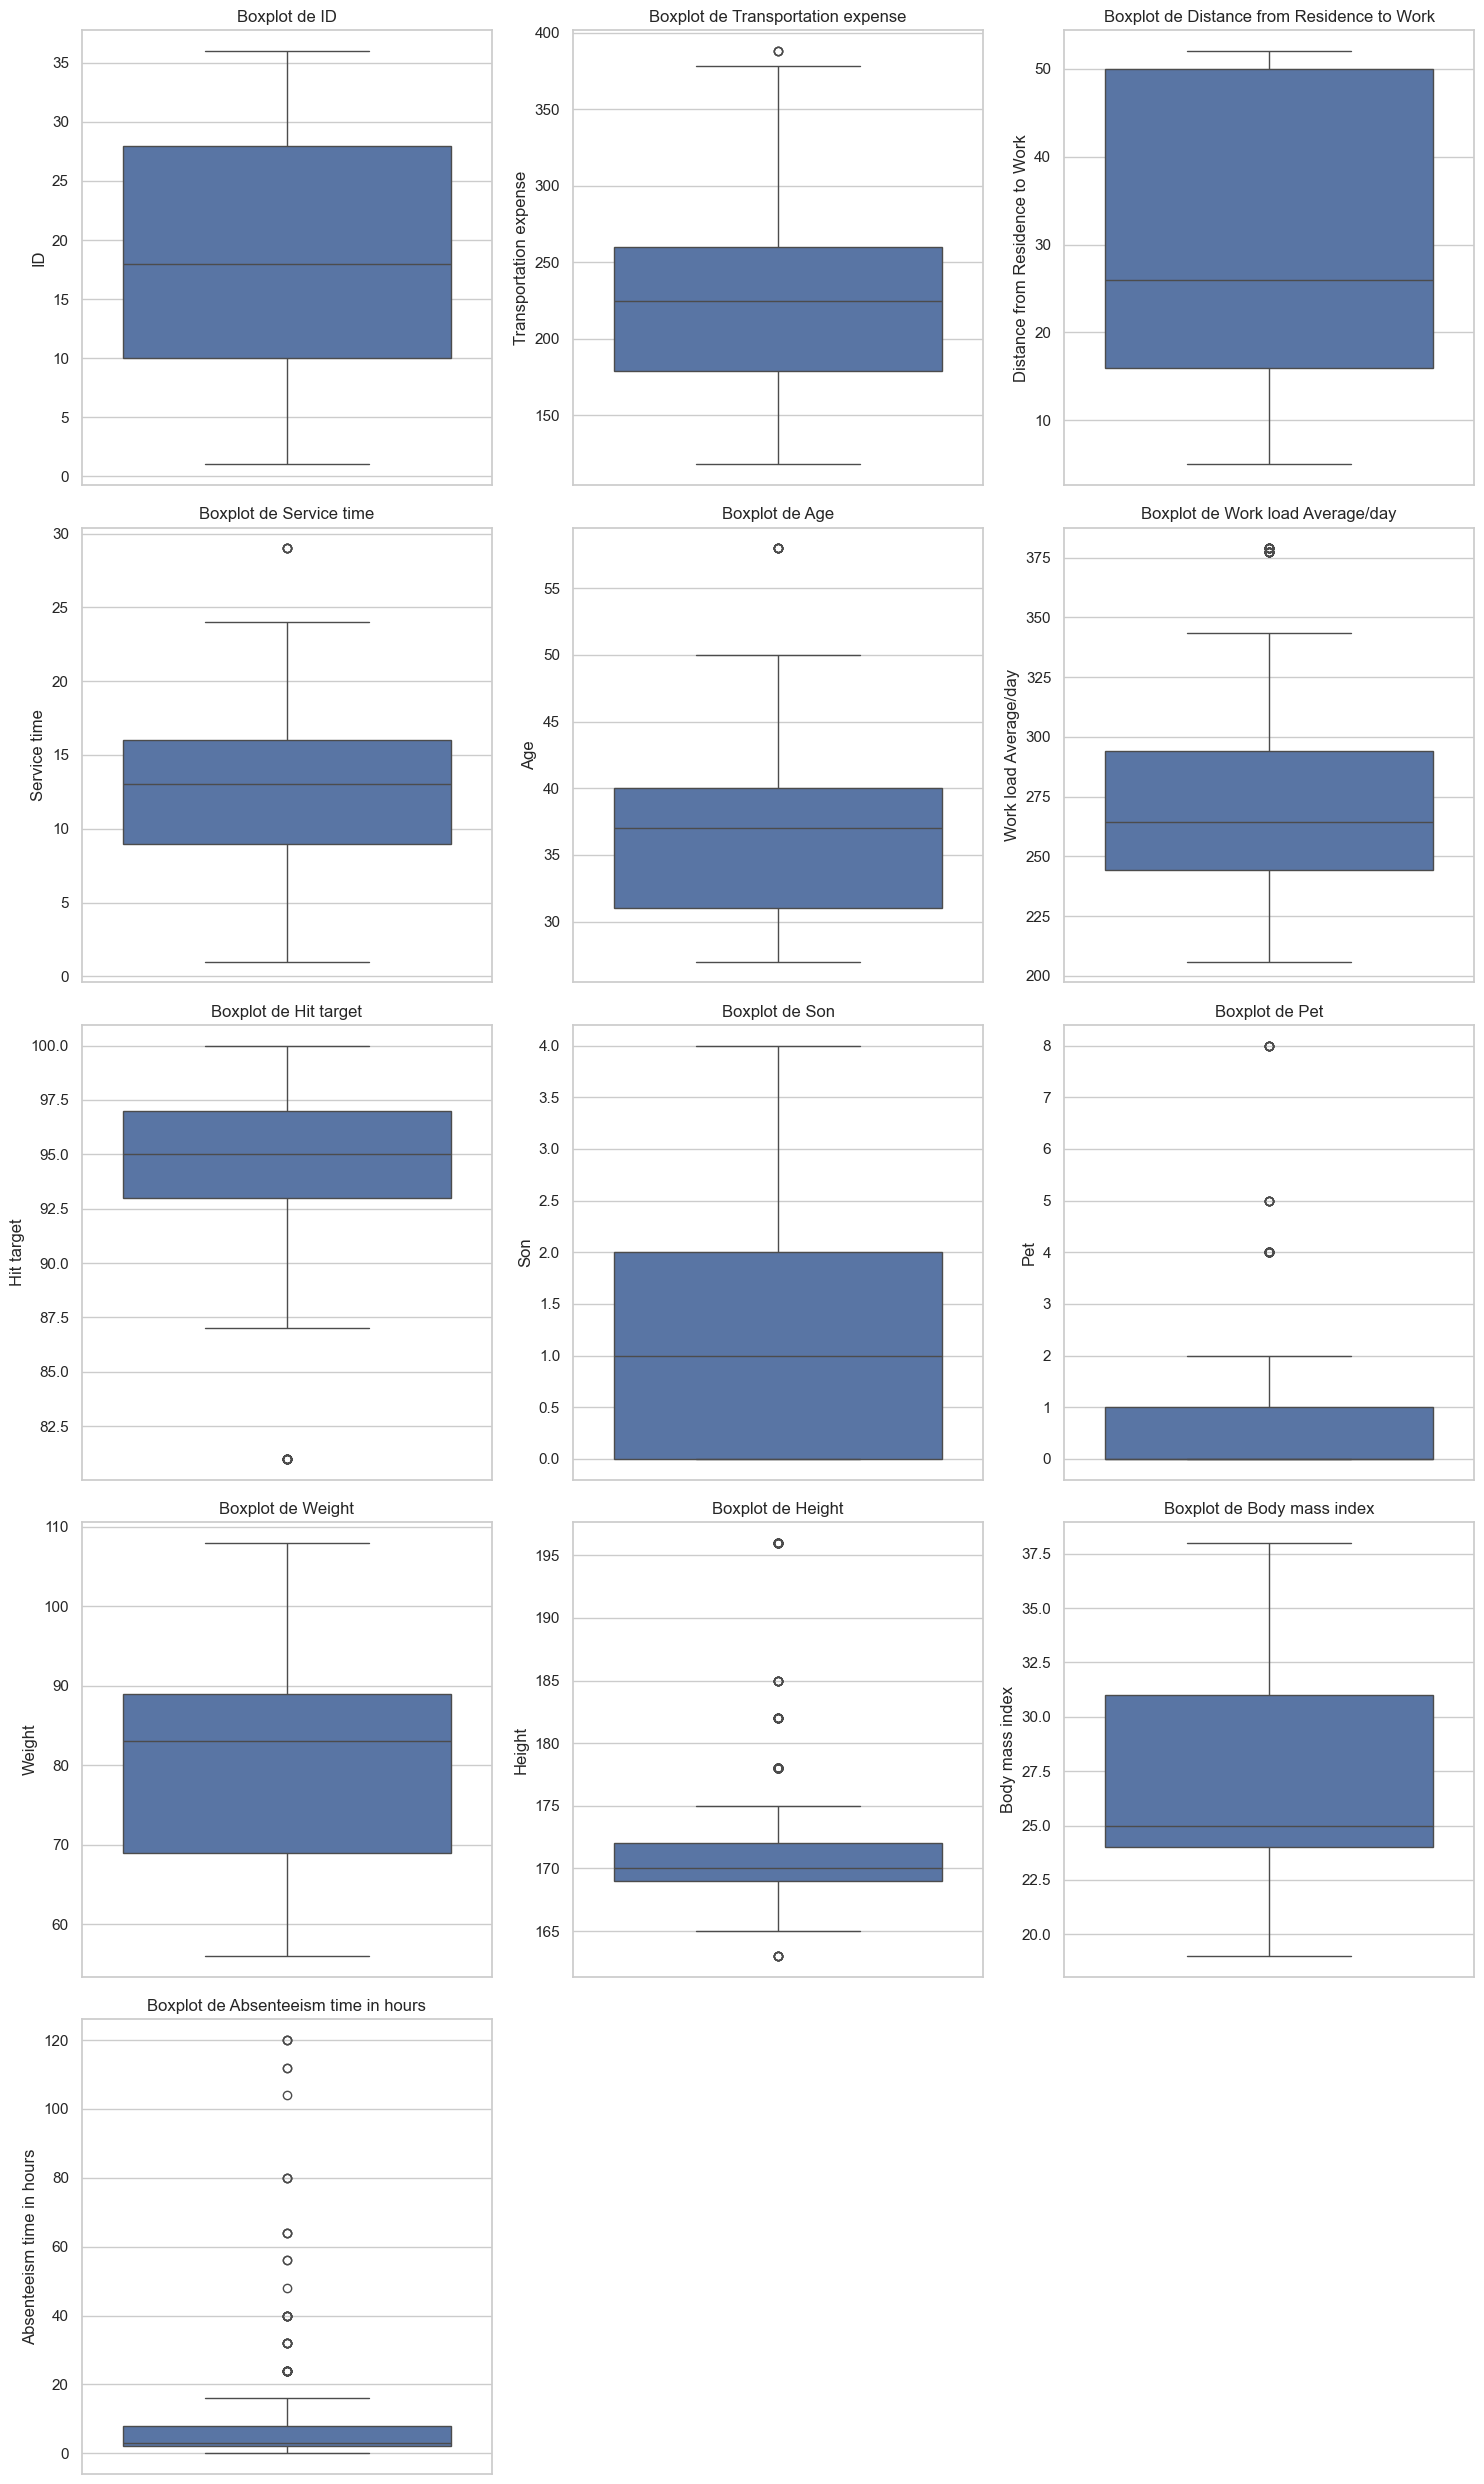

In [11]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plot_boxplots(df, num_cols)

> ⚠️ **Detección de valores atípicos:**  
> Se han identificado algunos **valores atípicos** en las variables numéricas del dataset.  
>
> 🧹 **Acción:** Procederemos a **eliminar estos registros extremos** para reducir su impacto en el análisis  
> y mejorar la calidad de los resultados.  
>
> 📊 **Siguiente paso:** Una vez depurados, **volveremos a generar los boxplots** para verificar  
> la distribución de los datos y confirmar que los valores atípicos fueron correctamente eliminados.


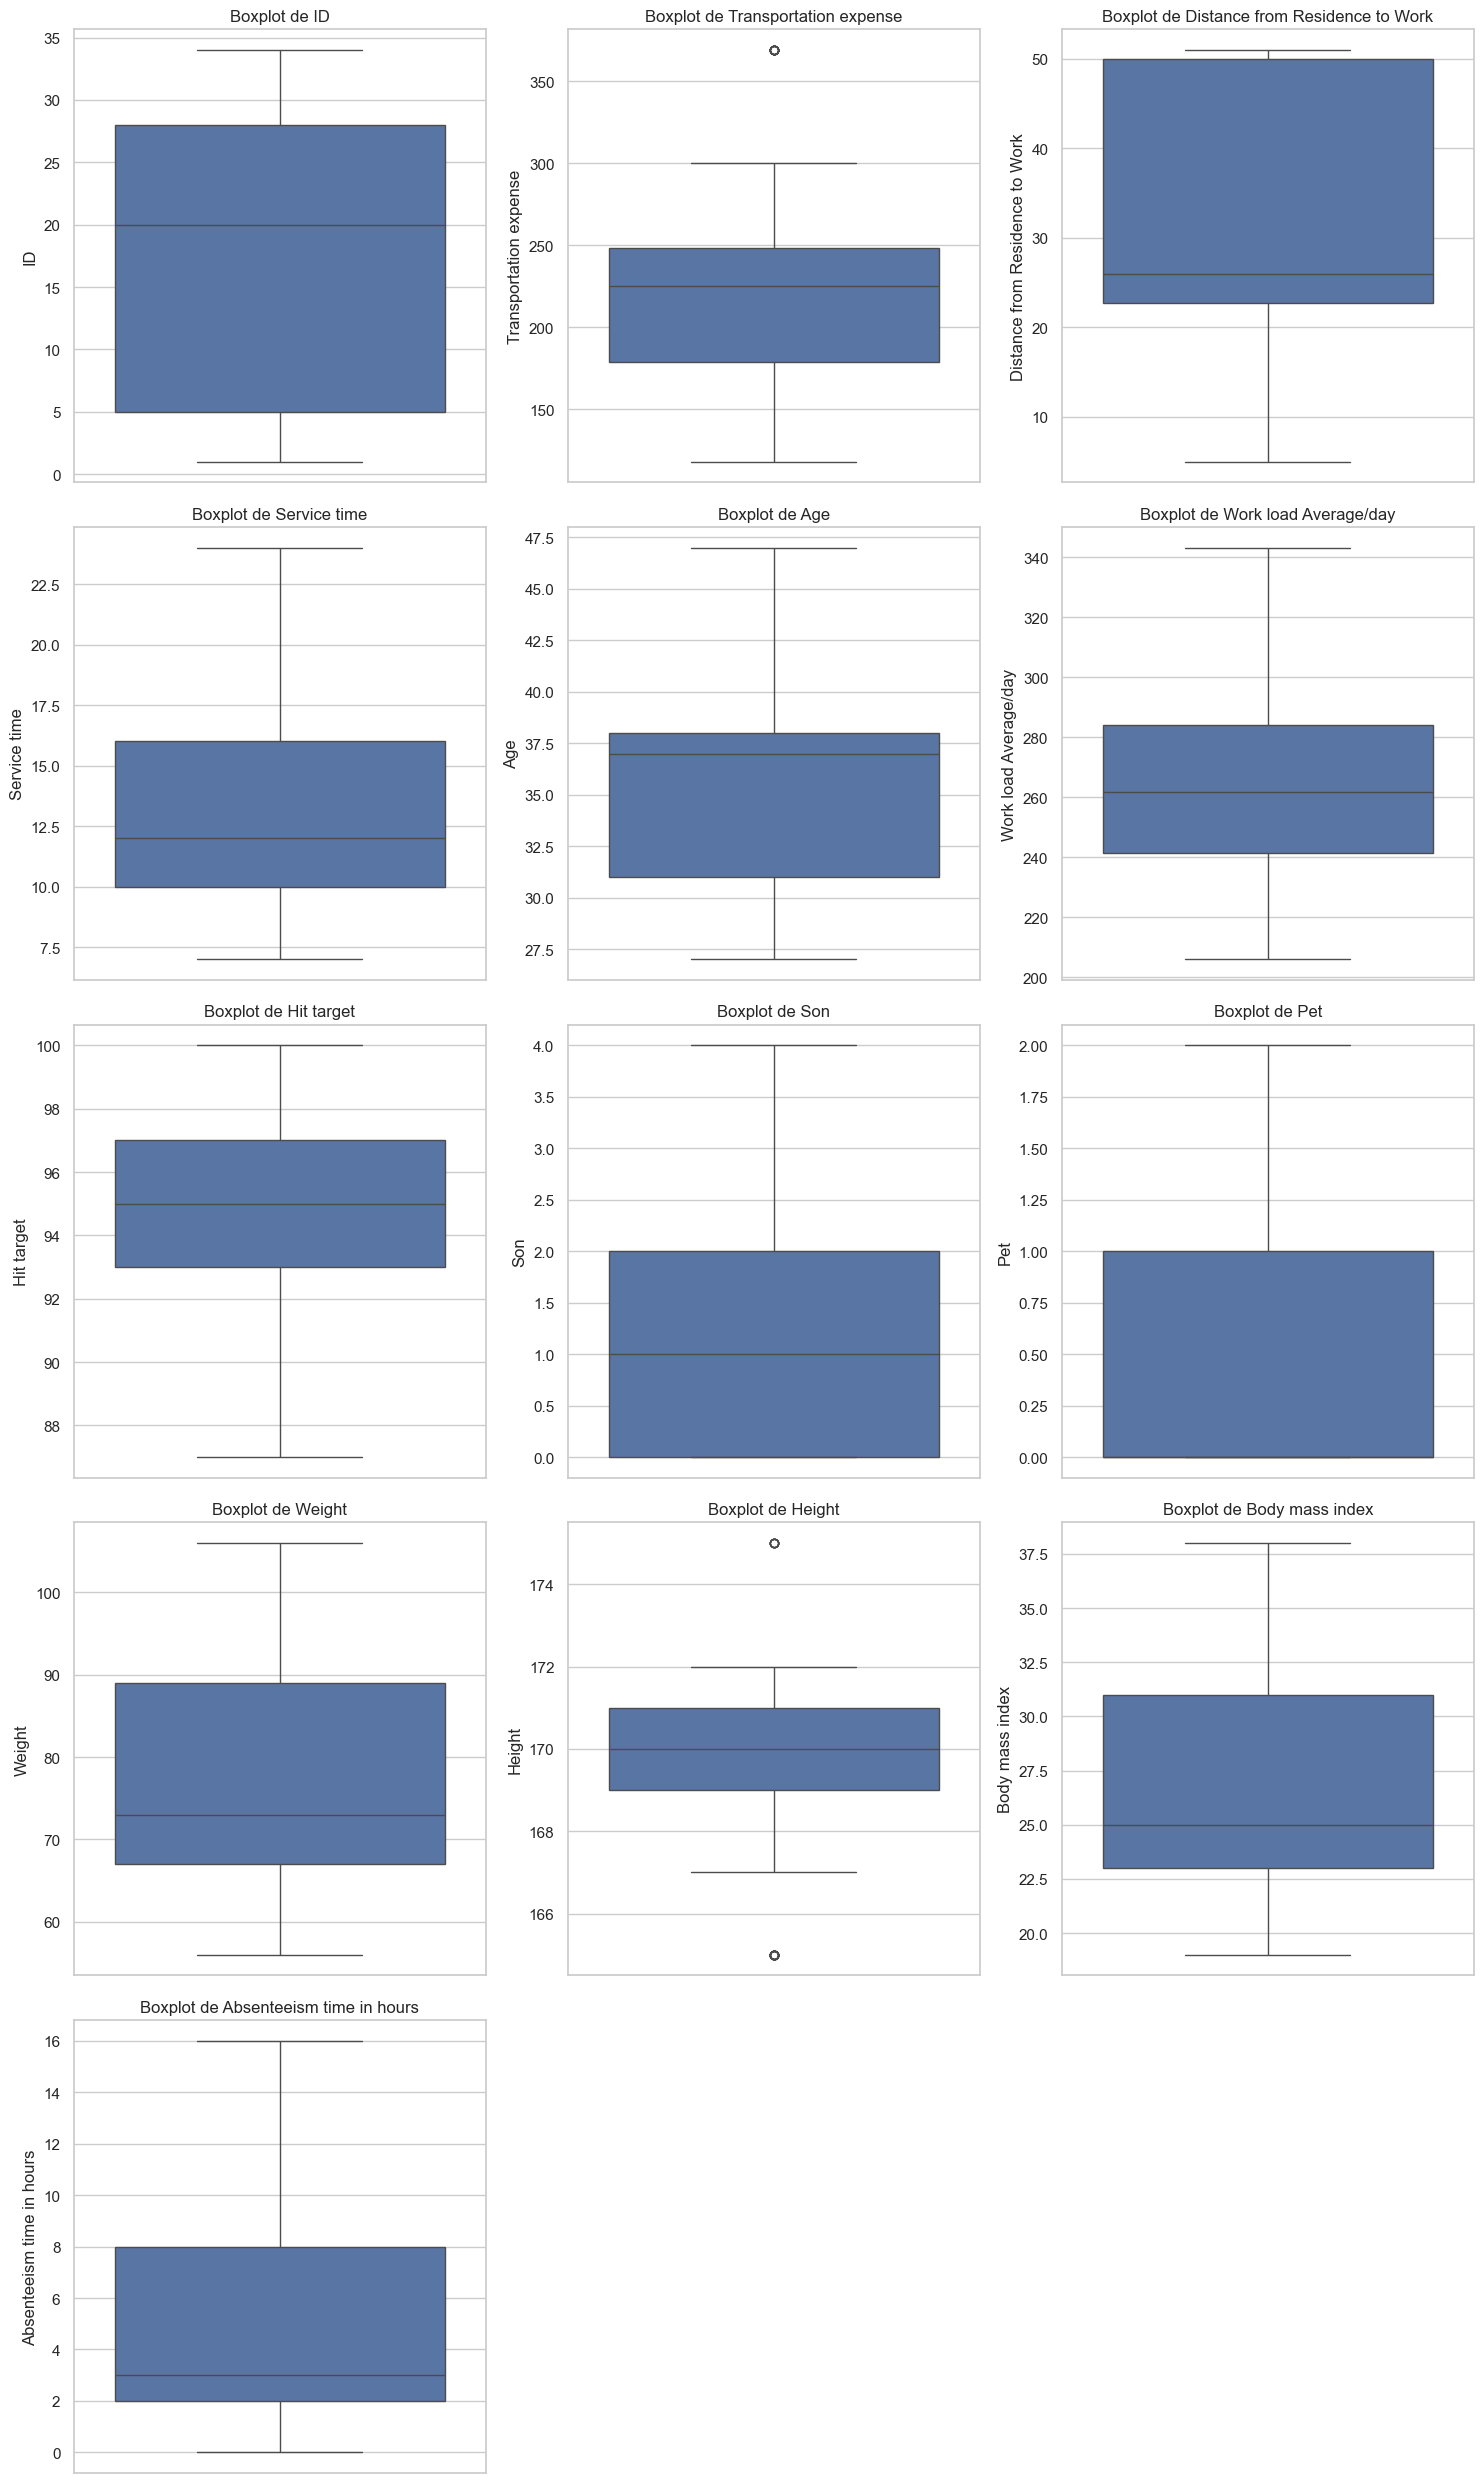

In [12]:
df = clean_outliers(df, method="iqr")
plot_boxplots(df, num_cols)

> 📊 **Análisis visual:**  
> A continuación, exploraremos las **distribuciones de las variables numéricas** del dataset  
> para observar su comportamiento, simetría y posibles sesgos.  
>
> 🔗 Además, generaremos un **mapa de correlación** para identificar relaciones lineales  
> entre las variables y detectar patrones que puedan aportar información relevante  
> para el modelado posterior.


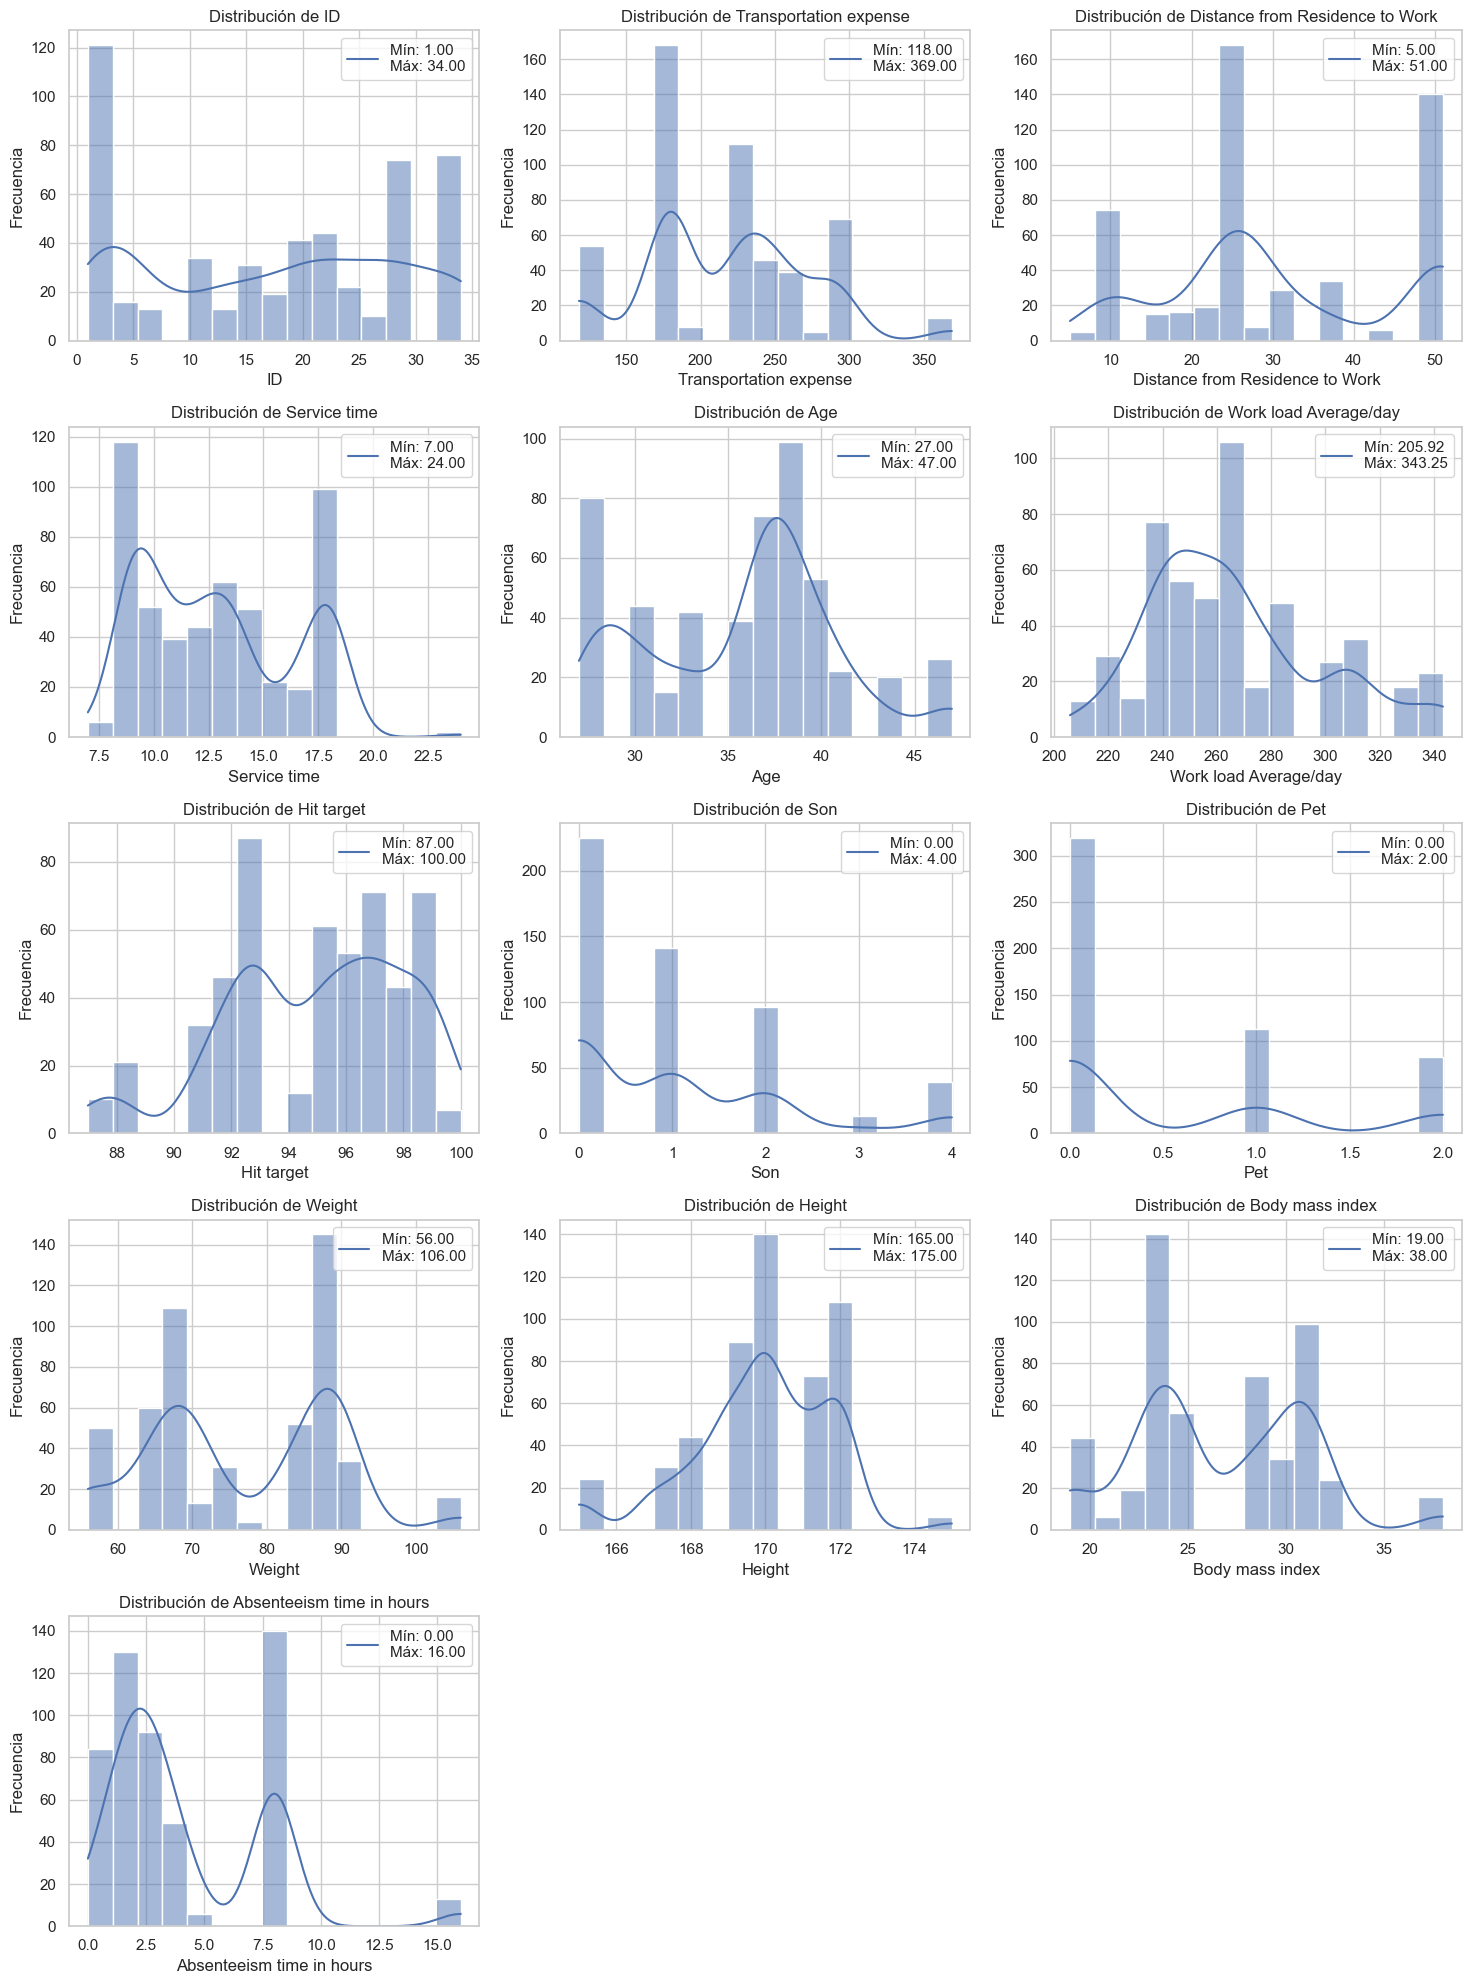

In [13]:
#  Distribución de variables numéricas
plot_distributions(df, num_cols, 3, 15)

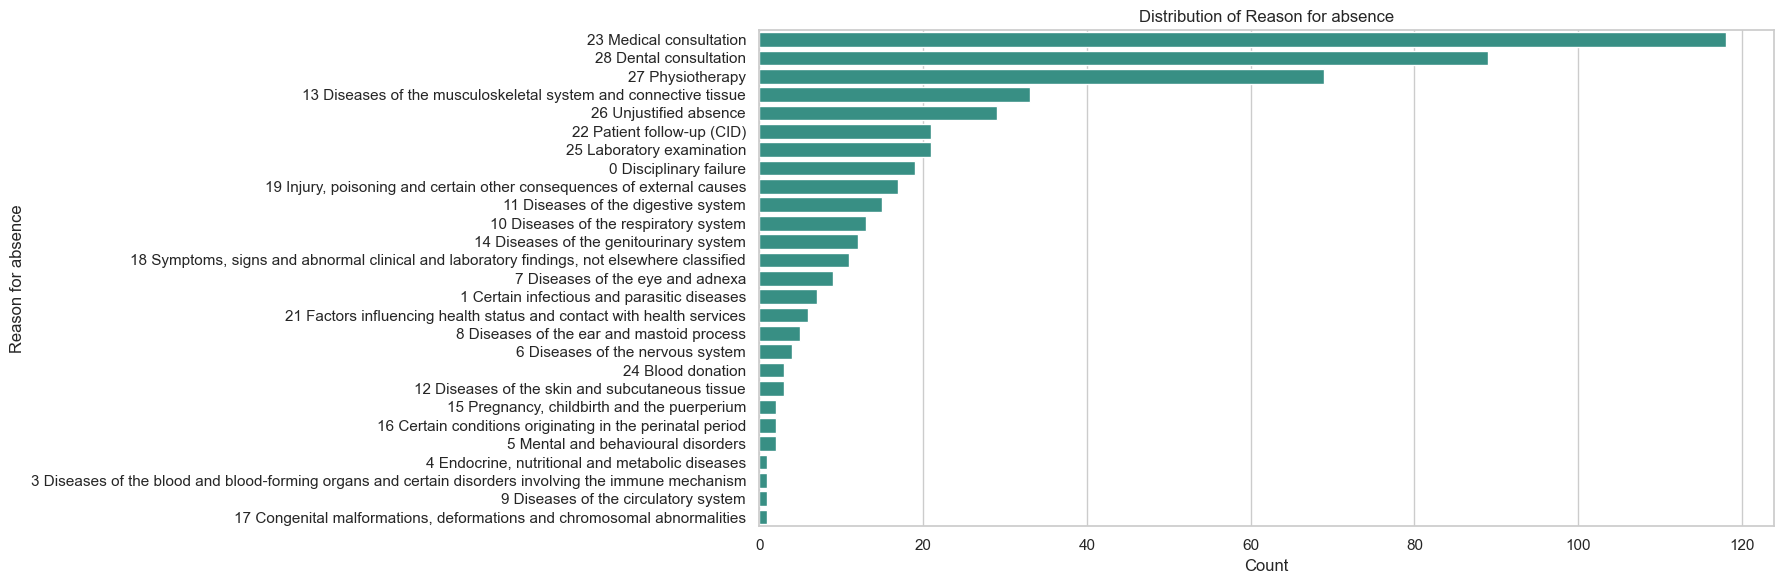

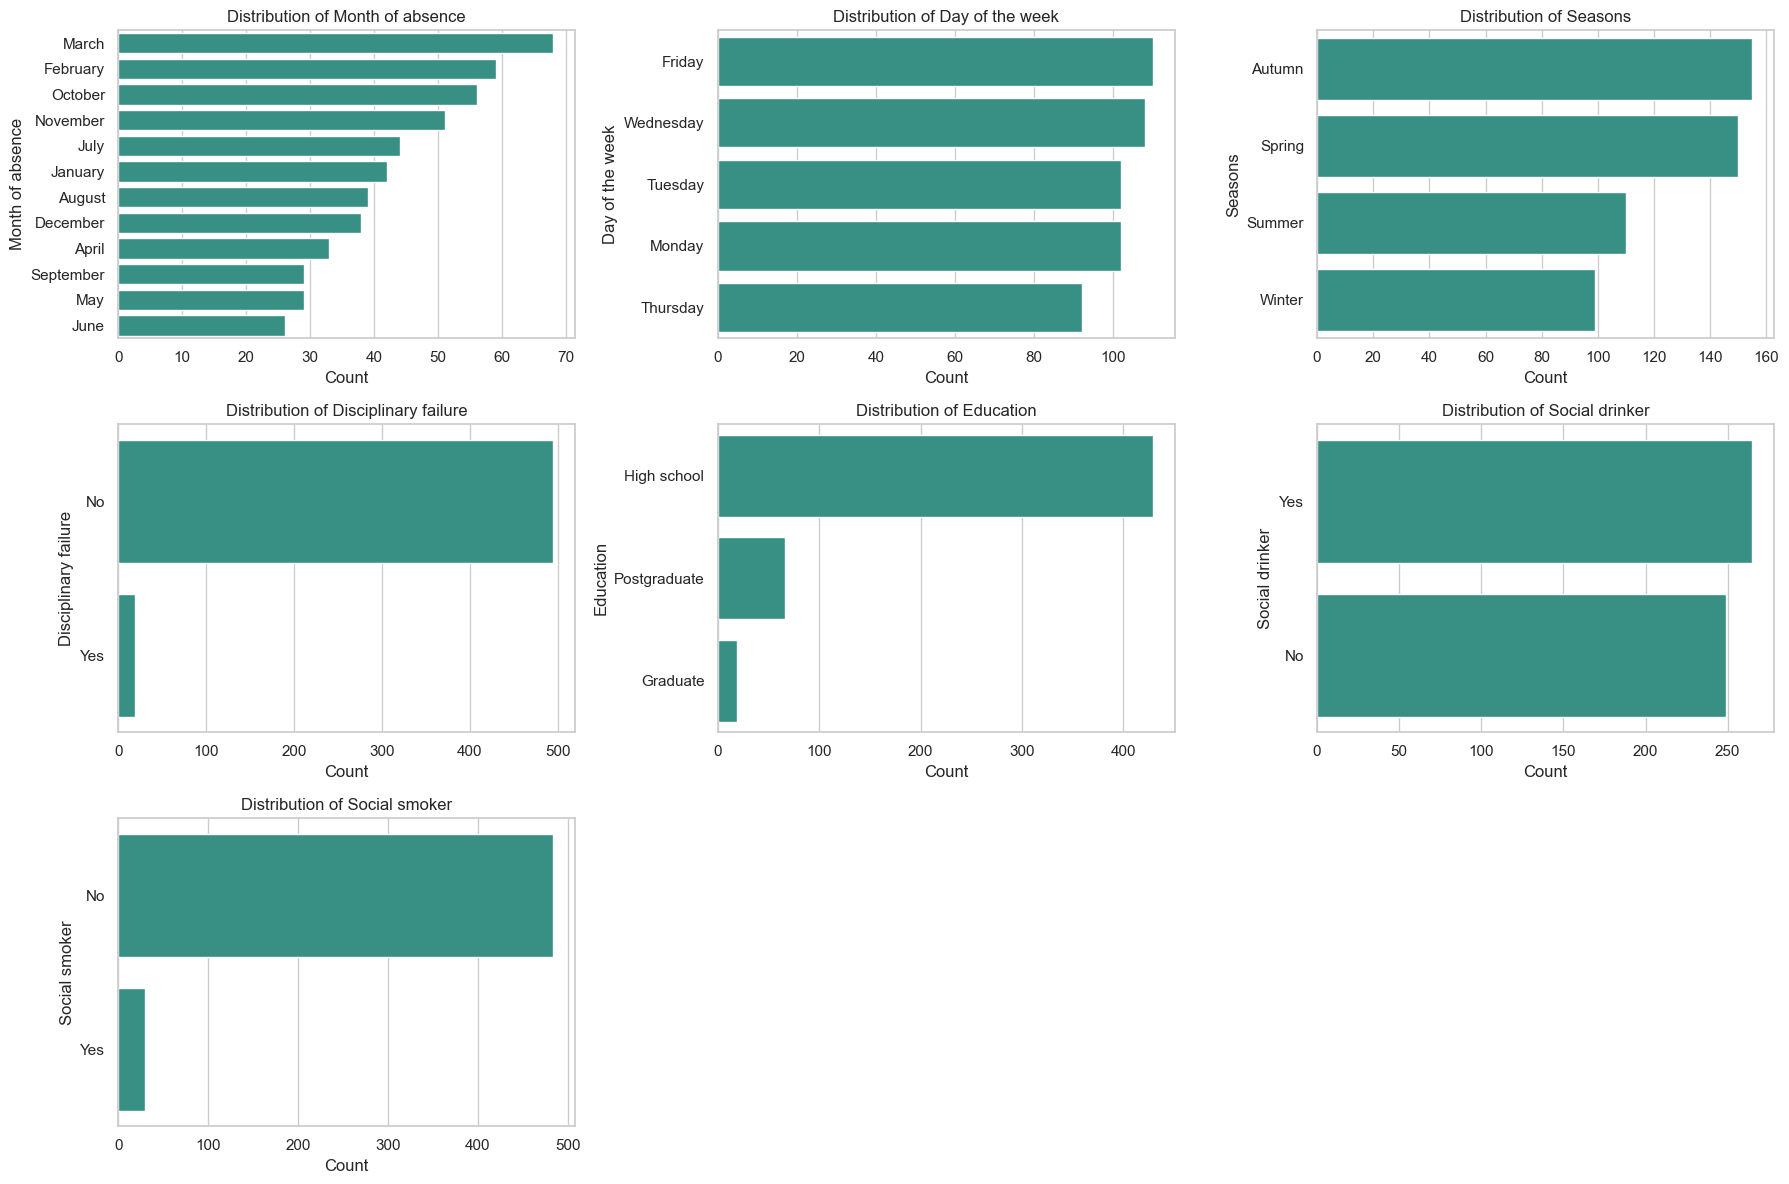

In [14]:
plot_categorical_distributions(df)

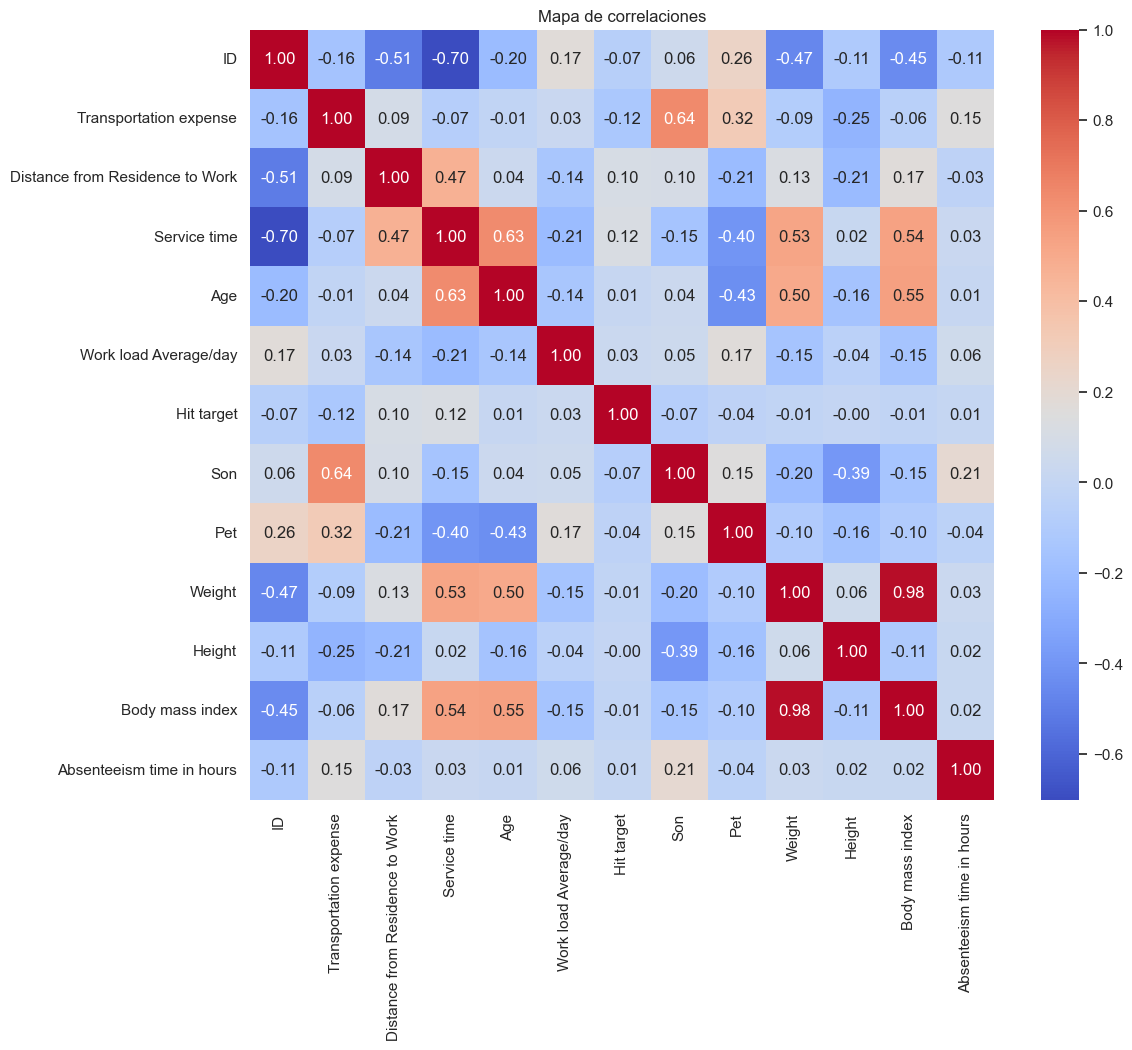

In [15]:
plot_correlation_map(df, num_cols)

> 🎯 **Relación con el ausentismo:**  
> En esta sección analizaremos **cómo se relacionan las diferentes variables** del dataset  
> con la variable objetivo **`Absenteeism time in hours`**.  
>
> 📈 Este análisis nos permitirá **identificar patrones, tendencias y posibles factores**  
> que influyen en el ausentismo laboral, aportando información valiosa  
> para la comprensión y modelado del fenómeno.


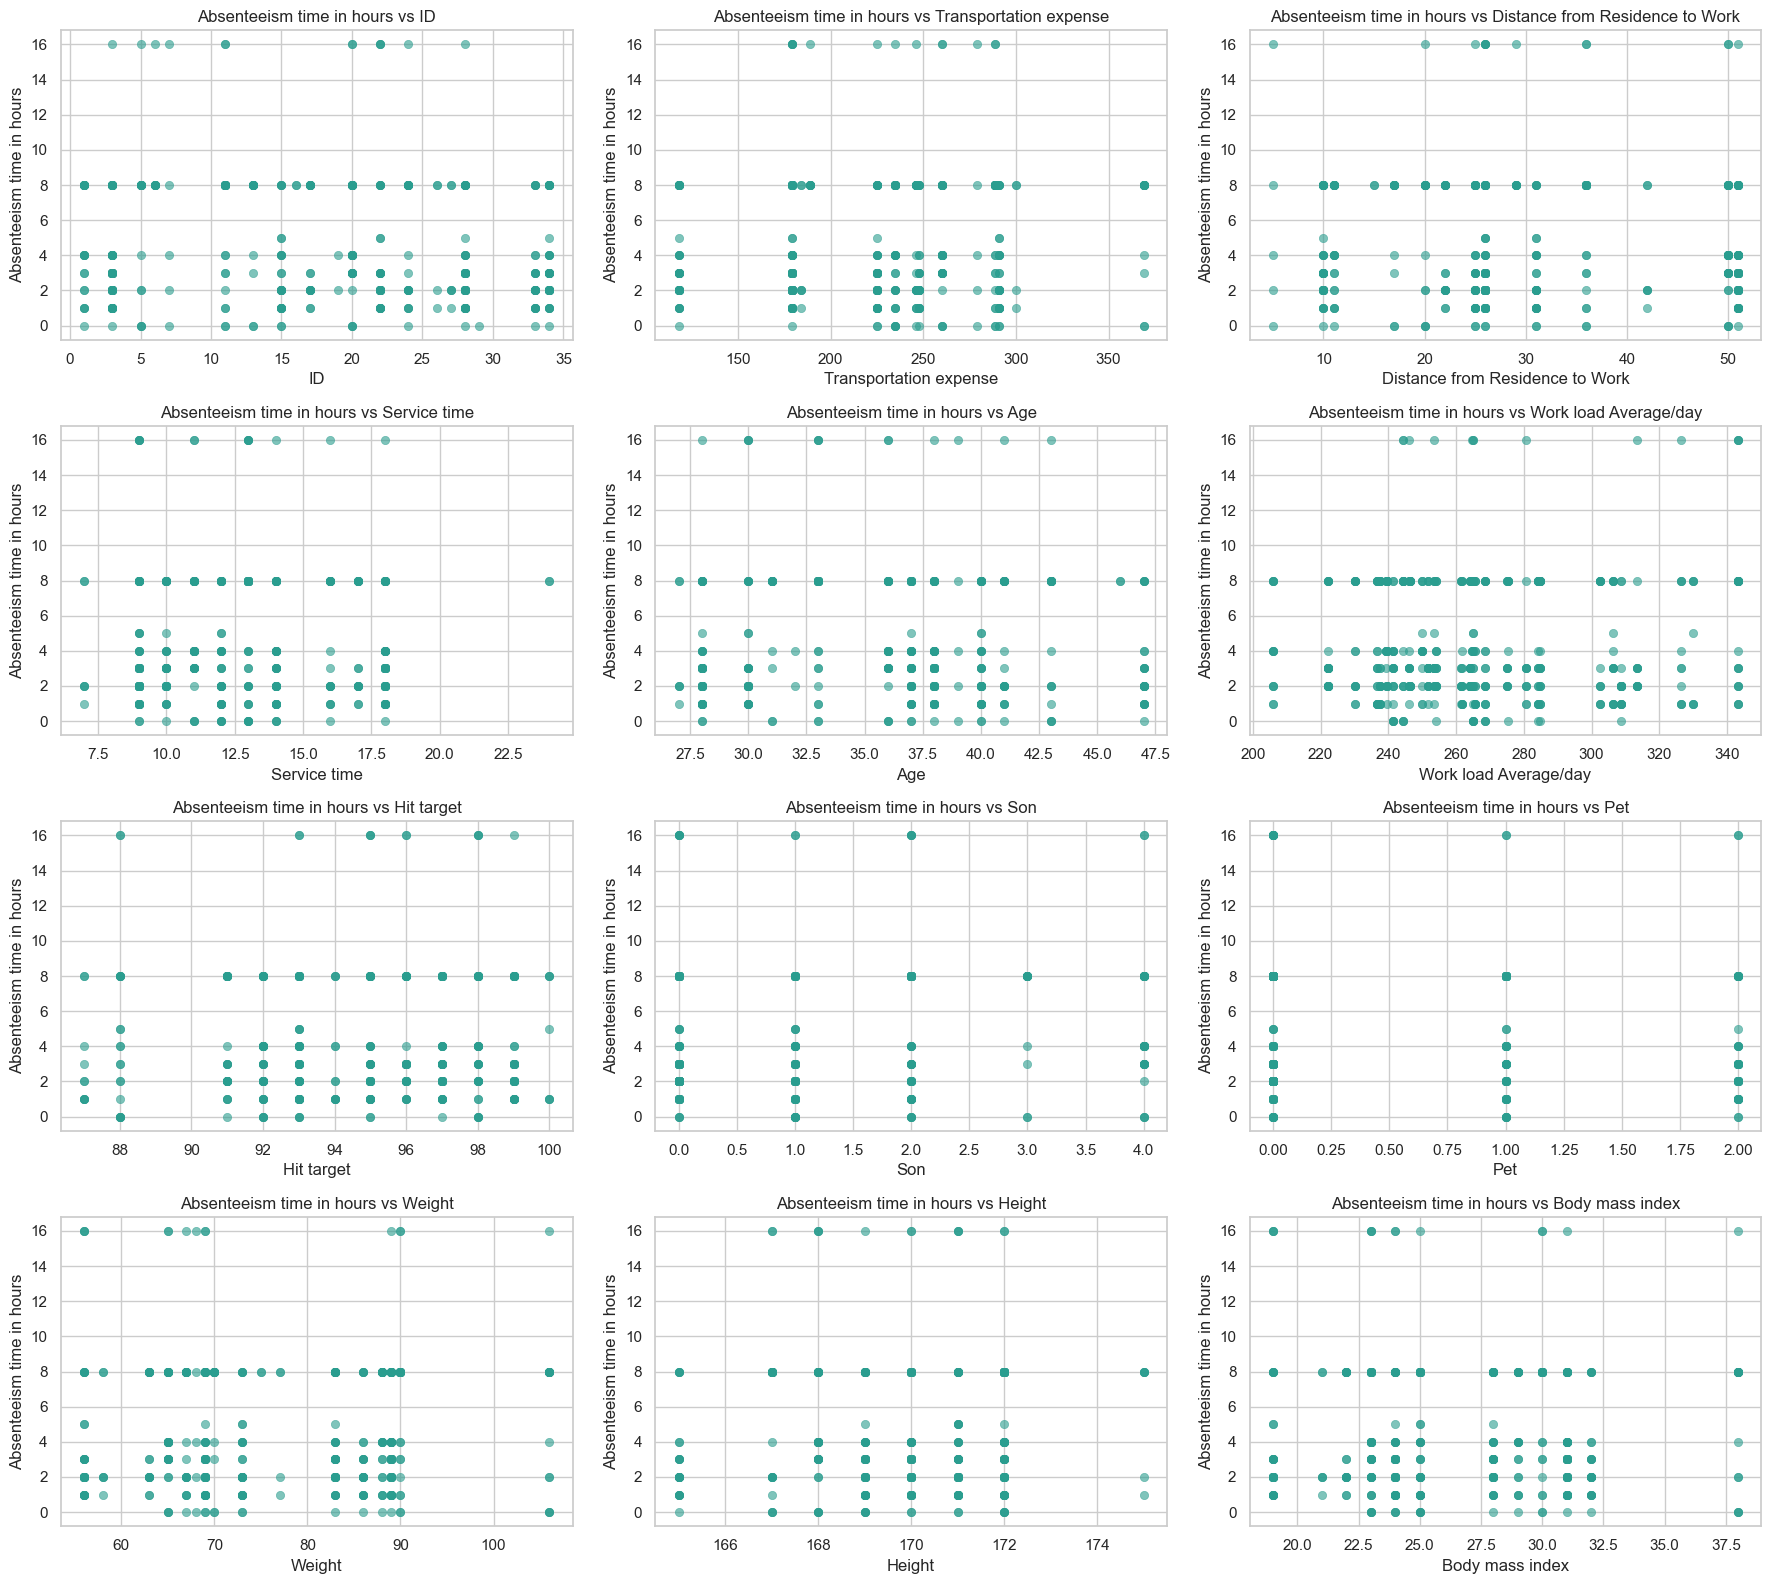

In [16]:
plot_absenteeism_relationships(df)

> 🤔 **Observación:**  
> No se aprecian **patrones evidentes** en la relación entre las variables y el ausentismo.  
>
> 🧩 **Siguiente paso:** Procederemos a realizar **_feature engineering_** con el objetivo de **crear nuevas variables derivadas**  
> o **transformar las existentes**, buscando descubrir **relaciones ocultas** que puedan aportar valor  
> al análisis y mejorar el desempeño de los modelos predictivos. Luego de eso volveremos a graficar


In [17]:
df = create_behavioral_features(df)

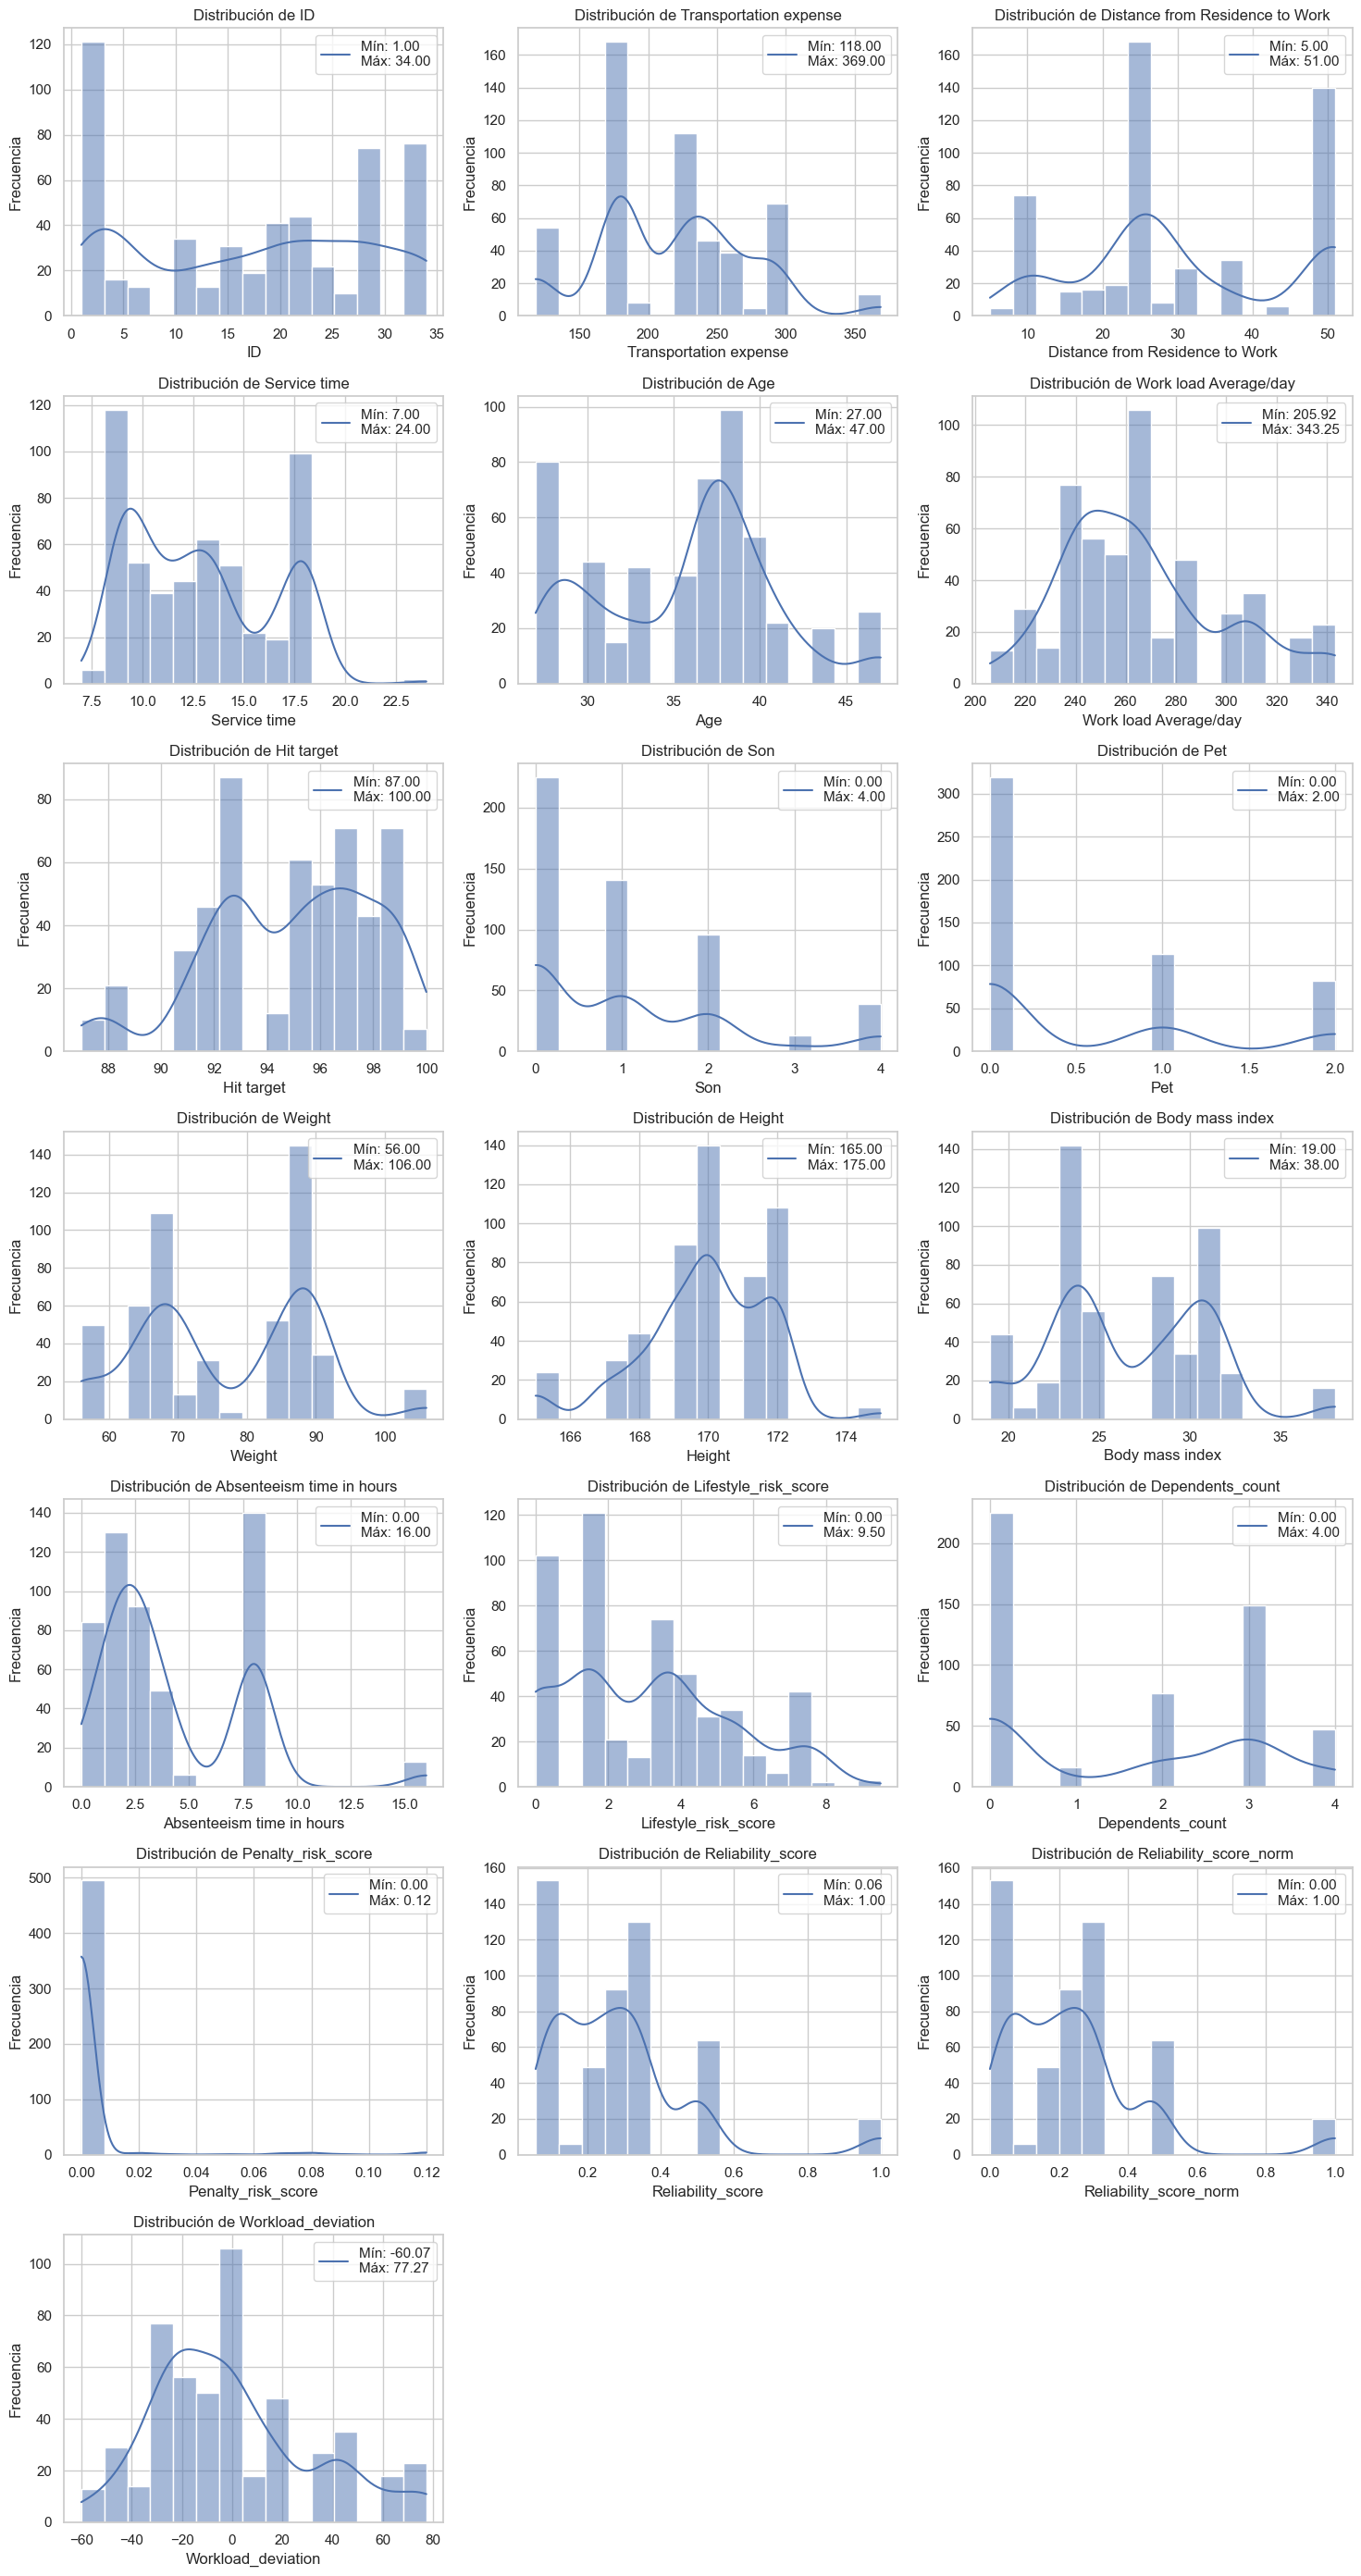

In [18]:
#  Distribución de variables numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plot_distributions(df, num_cols, 3, 15)

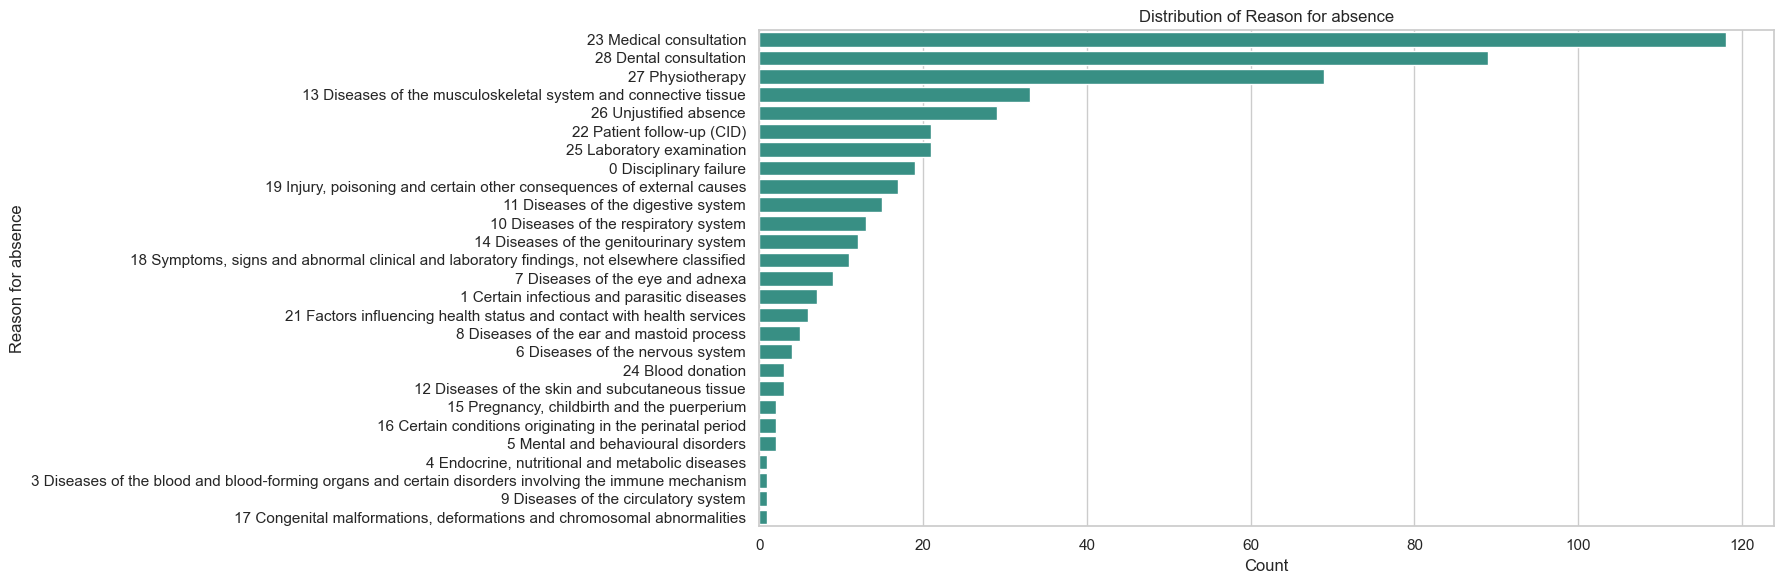

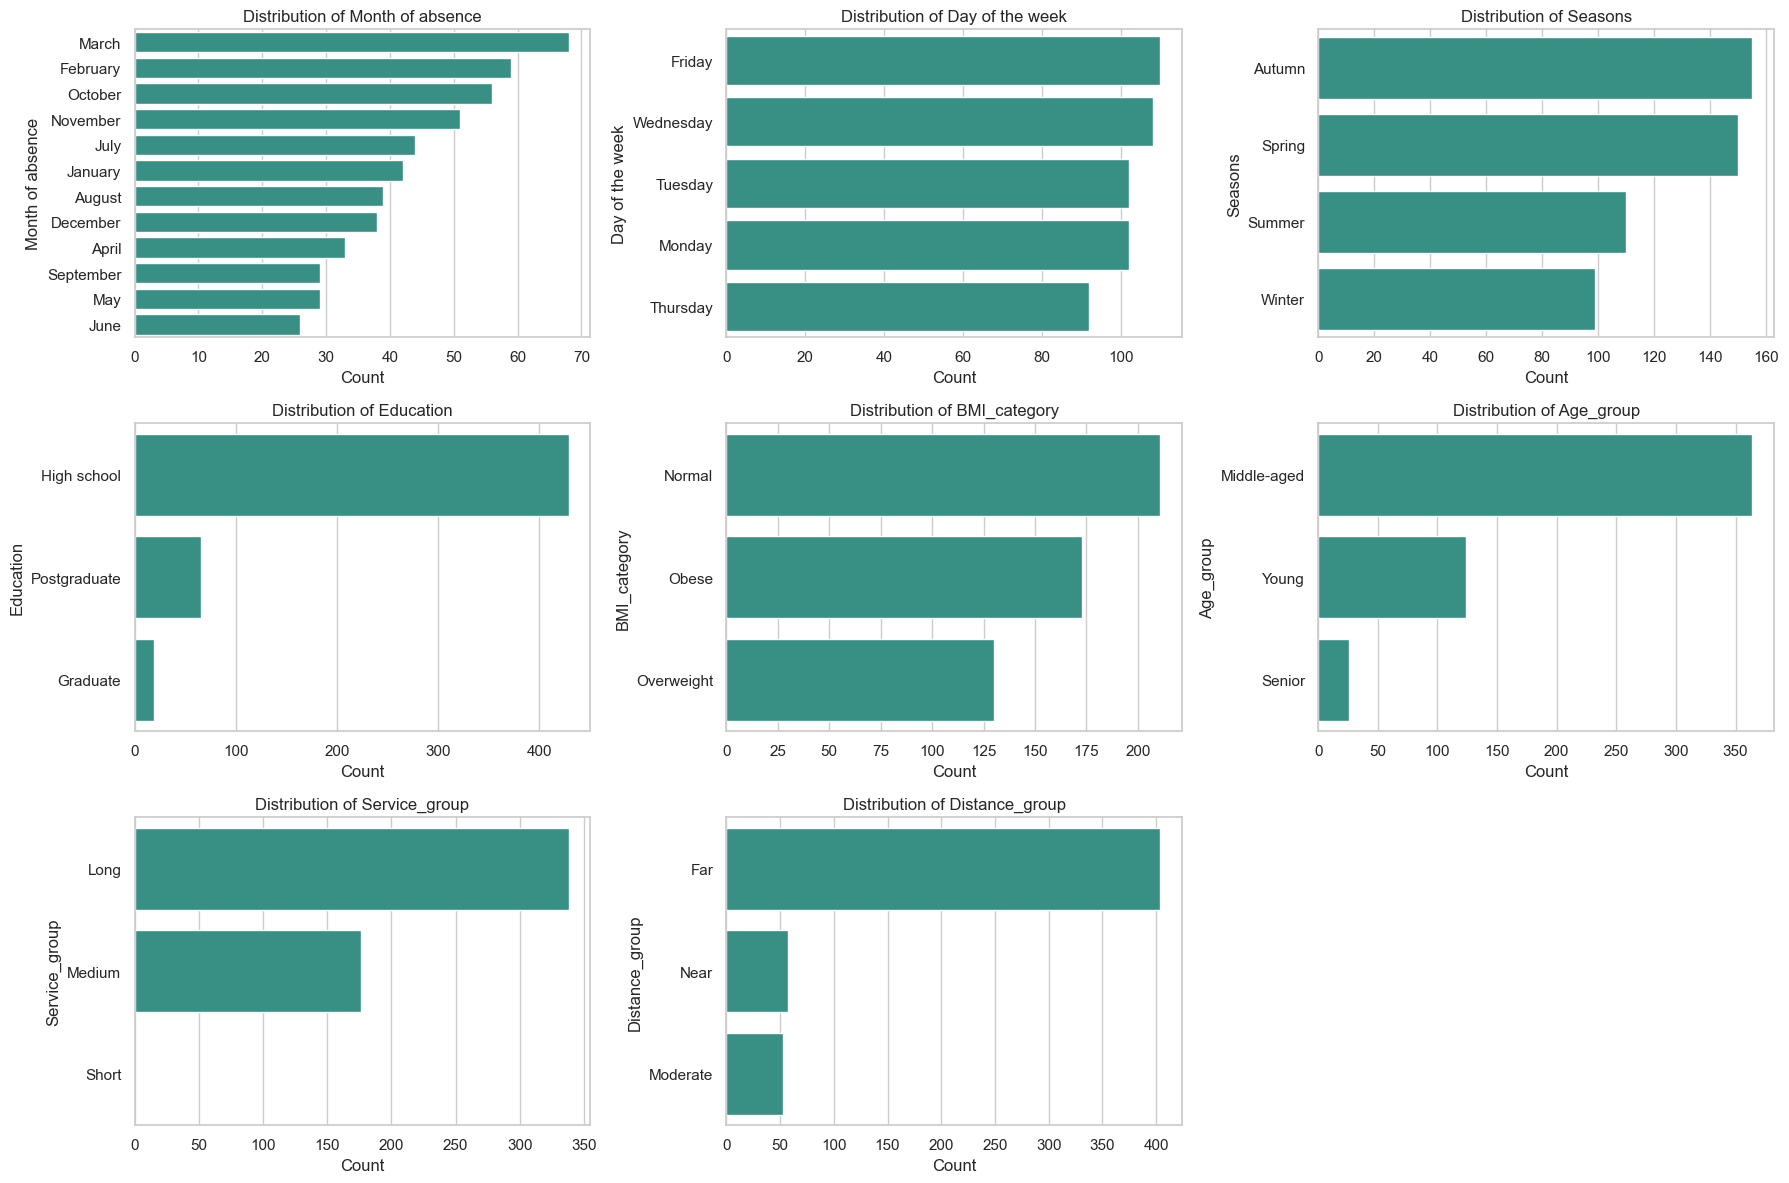

In [19]:
plot_categorical_distributions(df)

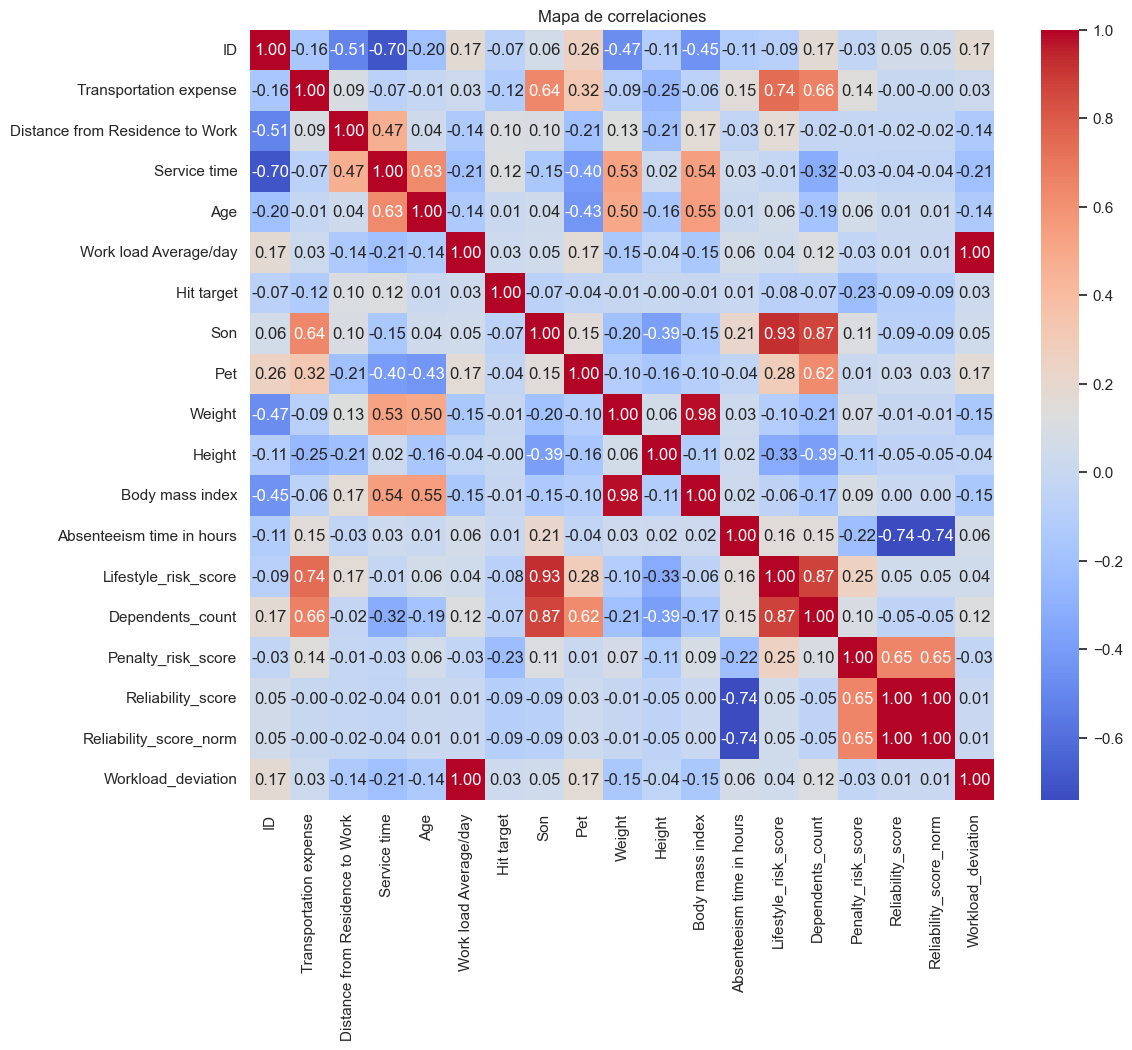

In [20]:
plot_correlation_map(df, num_cols)

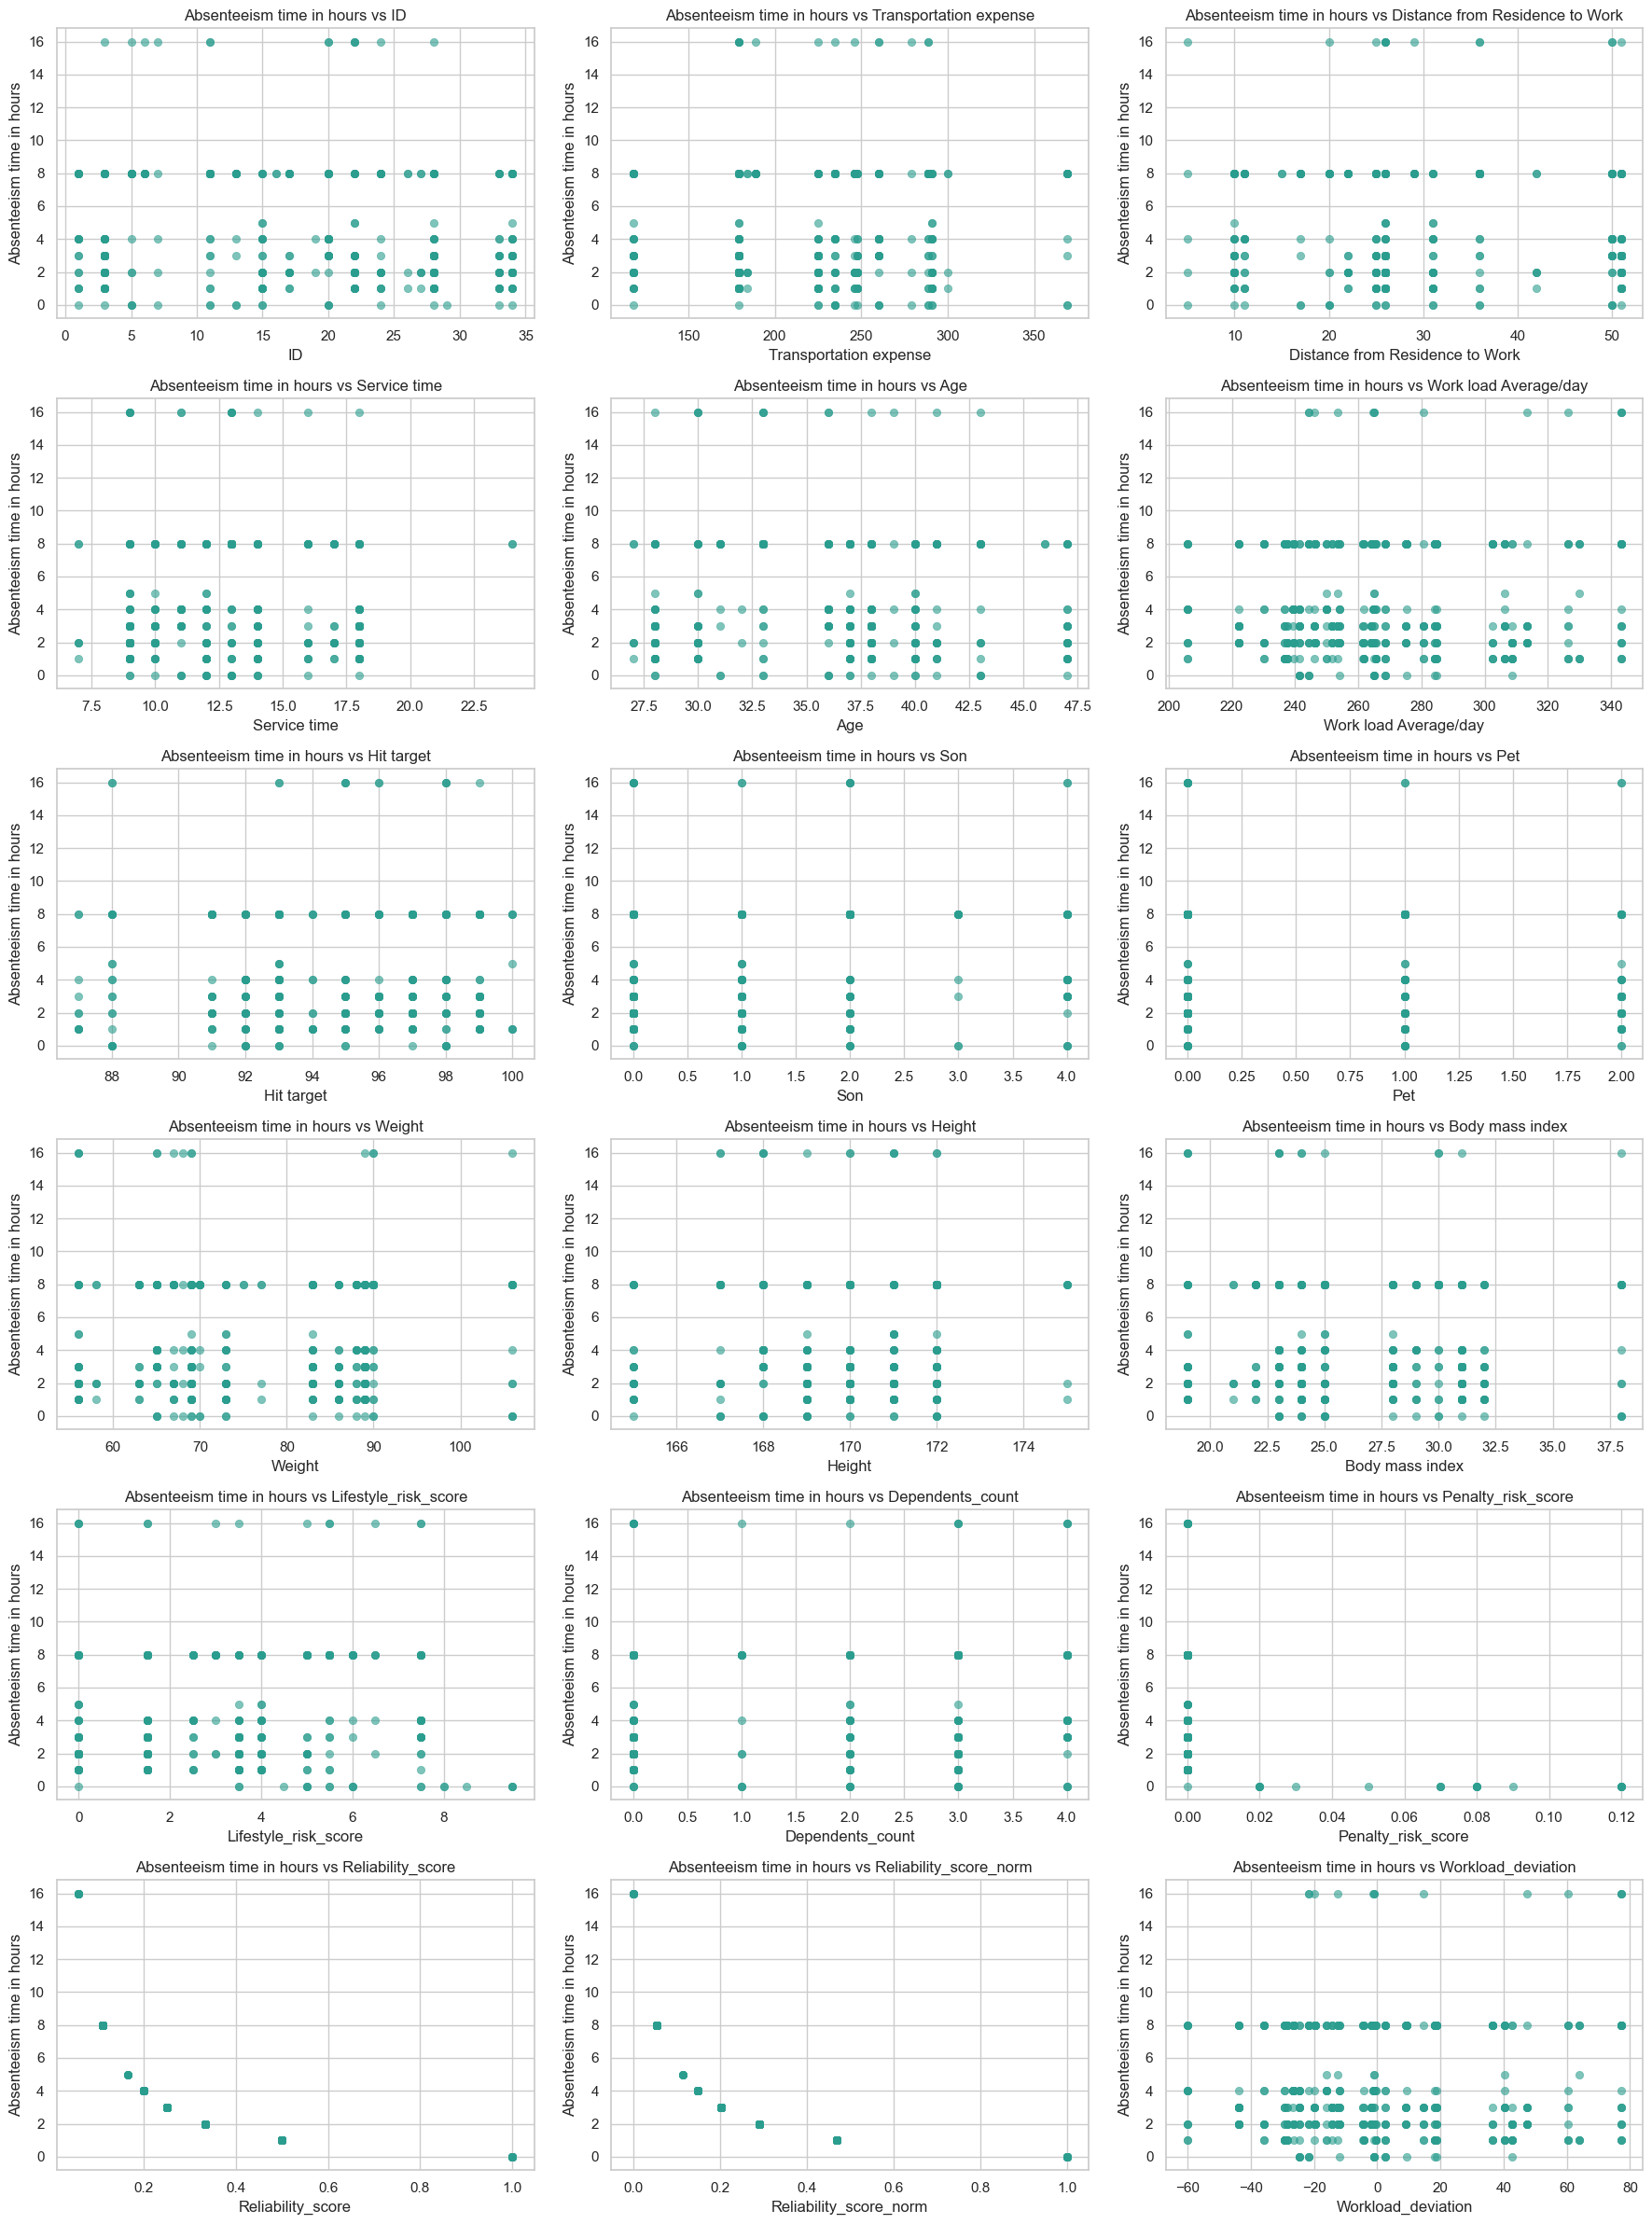

In [21]:
plot_absenteeism_relationships(df)

> 🔧 **Transformación de datos:**  
> En esta etapa aplicaremos **algunas transformaciones** sobre las variables del dataset  
> con el propósito de **mejorar su interpretación y detectar posibles patrones ocultos**.  
>
> 📊 **Siguiente paso:** Una vez realizadas las transformaciones, **volveremos a generar las gráficas**  
> para observar cómo cambian las distribuciones y las relaciones entre las variables  
> después del proceso de ajuste.


In [22]:
df = preprocess_dataset(df)

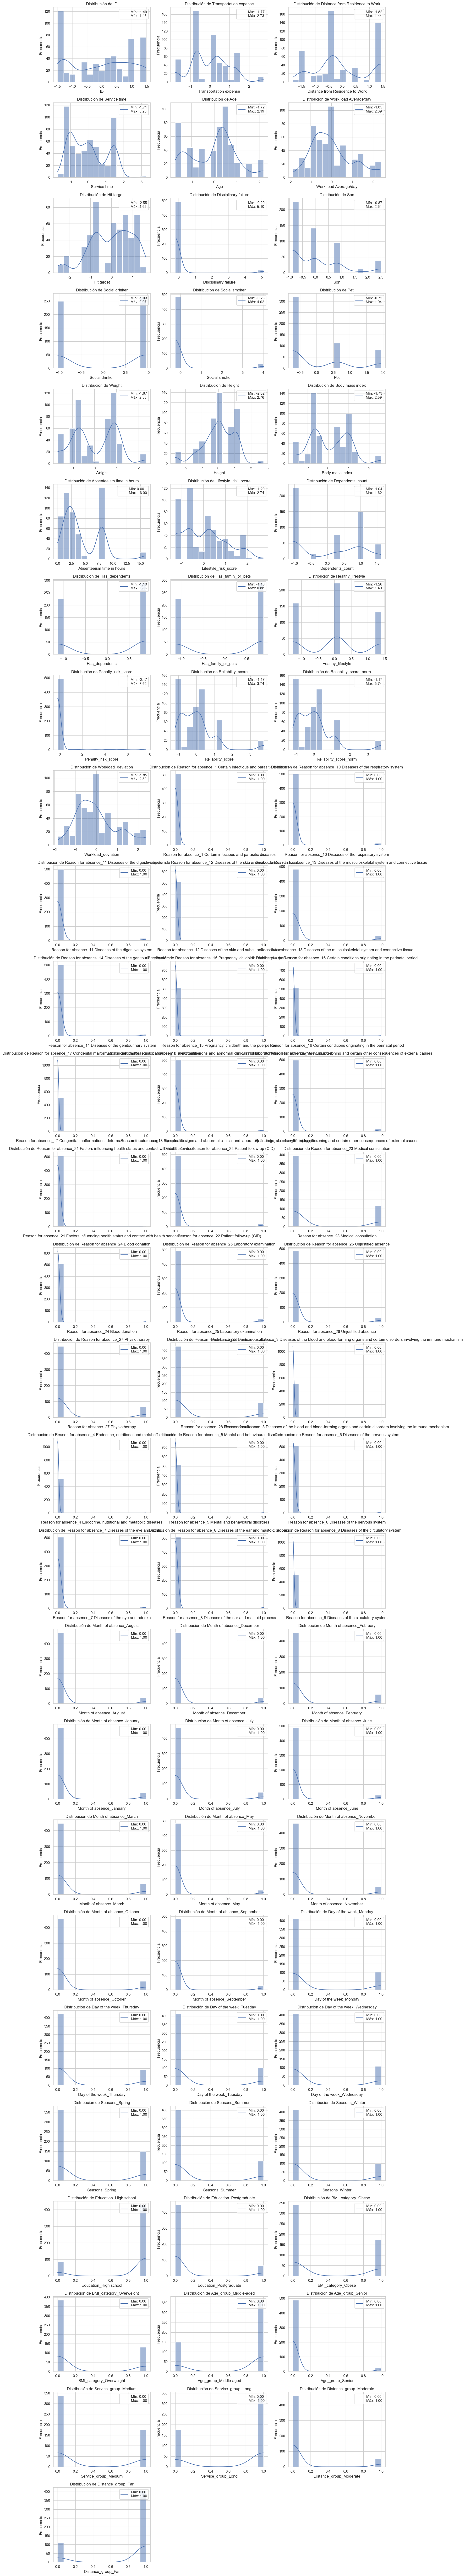

In [23]:
#  Distribución de variables numéricas
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
plot_distributions(df, num_cols, 3, 15)

In [24]:
plot_categorical_distributions(df)

<Figure size 1800x0 with 0 Axes>

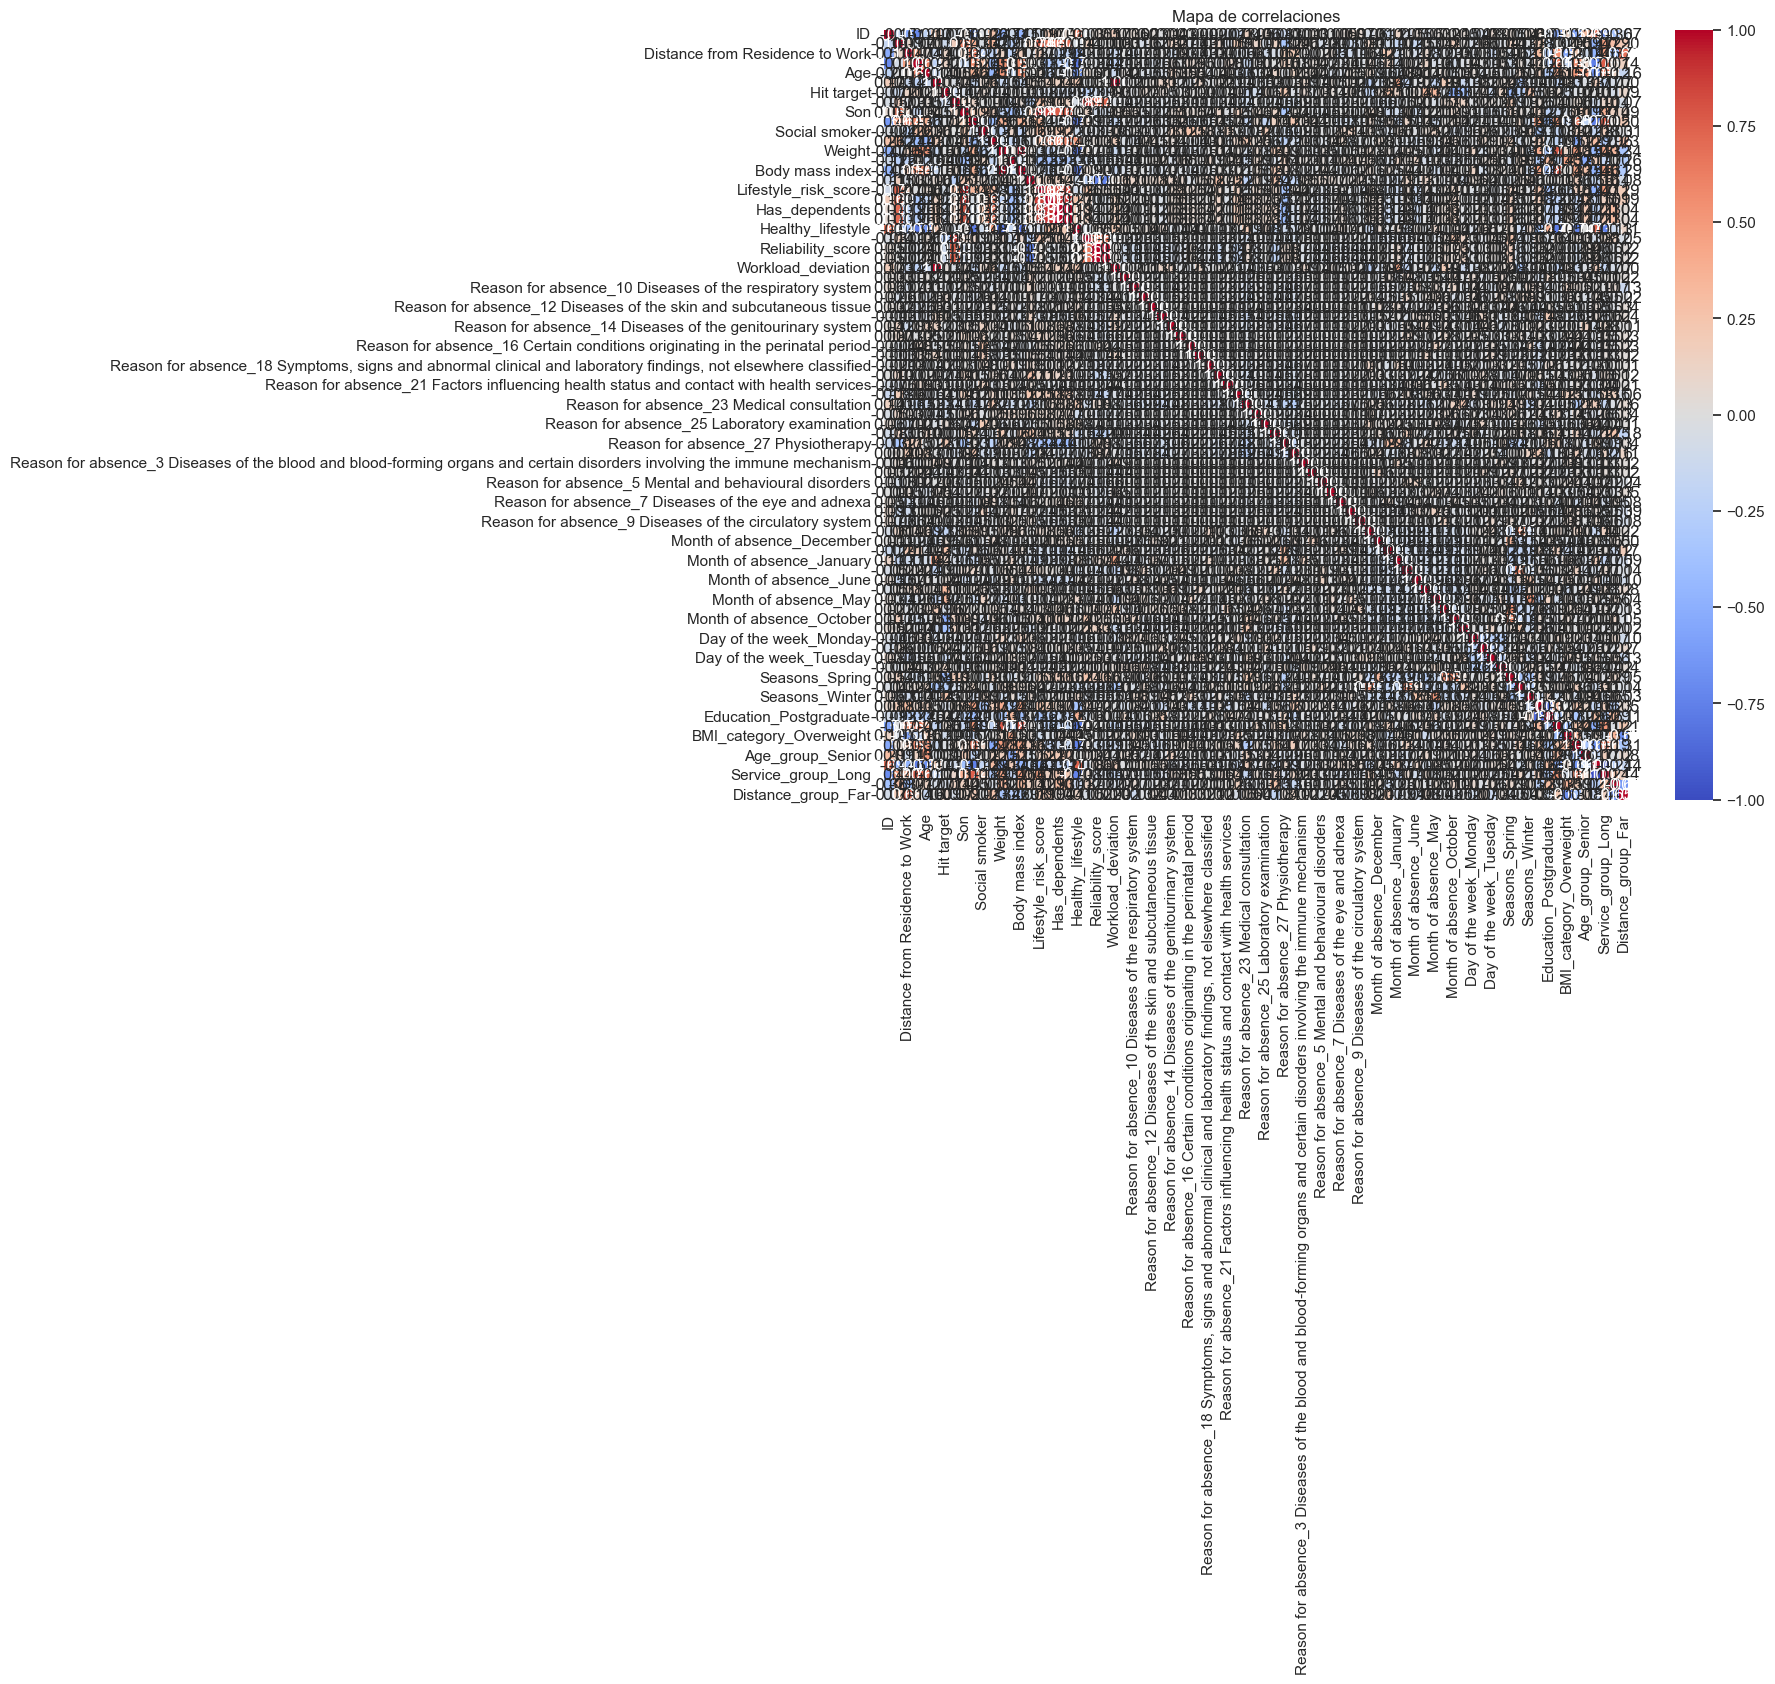

In [25]:
plot_correlation_map(df, num_cols)

In [ ]:
plot_absenteeism_relationships(df)

> 📈 **Nuevos hallazgos:**  
> Tras las transformaciones, se identificaron **tendencias interesantes** en las nuevas características  
> **`reliability_score`** y **`penalty_risk_score`**, las cuales podrían aportar información relevante  
> sobre el comportamiento del ausentismo.  
>
> 💾 **Acción:** Guardaremos el **dataset resultante** como un **conjunto intermedio**,  
> con el fin de **mantener un registro de los hallazgos obtenidos** y facilitar la trazabilidad  
> del proceso de análisis y modelado.


In [ ]:
# Ruta del archivo intermedio
ruta_salida = '../data/interim/absenteeism_eda_fe_intermediate.csv'

# Guardar el dataset
df.to_csv(ruta_salida, index=False)

print(f"✅ Dataset intermedio guardado correctamente en: {ruta_salida}")